# Rainfall prediction in Australia

### Objective

This project has been done as a part of project submission for UCD Specialist Certificate in Data Analytics. The objective of the project is to predict next-day rain by training classification models on the target variable RainTomorrow.

### Data source

The data has been fetched from Kaggle - https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.

### Analysis pipeline - the OSEMN approach¶

* Obtain the data
* Scrubbing / Cleaning the data
* Exploring / Visualizing our data
* Modeling the data
* iNterpreting the results

### Environment set-up and loading dependencies

Jupyter notebook is used to do the analysis and Github is used to version the changes. Dependencies used are below -

In [46]:
# Data analysis
import numpy as np 
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report, log_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Helper libraries
import warnings
warnings.filterwarnings('ignore')
import pickle

# Obtain the data

In [2]:
data = pd.read_csv('weatherAUS.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Scrubbing / Cleaning the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

*The dataset has 23 columns with a combination of date, geographical, categorical and numerical variables. There are missing information in the columns.*

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
# Finding the percentage of missing variables in the dataset
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df

,column_name,percent_missing
Sunshine,Sunshine,48.009762
Evaporation,Evaporation,43.166506
Cloud3pm,Cloud3pm,40.807095
Cloud9am,Cloud9am,38.421559
Pressure9am,Pressure9am,10.356799
Pressure3pm,Pressure3pm,10.331363
WindDir9am,WindDir9am,7.263853
WindGustDir,WindGustDir,7.098859
WindGustSpeed,WindGustSpeed,7.055548
Humidity3pm,Humidity3pm,3.098446


*Sunshine, Evaporation have more than 40% of values missing in the data, followed by Cloud3pm and Cloud9am. We will drop these variables in the next steps as they have a lot of missing information.*

### Helper functions

The below functions will be used during the analysis. 

In [7]:
# Function to find unique values in a column and count of respective values
def unique_values(df):
    for col in df:
        if data.dtypes[col] == 'O':
            print('Column name: ', df[col].name)
            print(pd.value_counts(df[col]))
            
# A plotting function to help with count plots
def count_plotter(df):
    for col in df:
        if data.dtypes[col] == 'O':
            plt.figure(figsize=(20, 10))
            sns.countplot(df[col], palette = 'Blues')
            plt.show()
            
# A plotting function to help with bar plots
def barplotter(df):
    for col in df.drop('Location',axis=1):
        plt.figure(figsize=[50,5])
        sns.barplot(x=df['Location'],y=df[col], order=df.sort_values(col).Location, palette = 'Blues')
        plt.show()
        
# A plotting function to plot roc curve
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [12]:
# Converting Date column to Pandas Datetime variable
data['Date'] = pd.to_datetime(data['Date'])

# Exploring / Visualizing our data

In [8]:
unique_values(data)

Column name:  Date
2013-11-13    49
2014-06-18    49
2016-01-12    49
2016-05-22    49
2013-04-10    49
              ..
2007-12-02     1
2007-11-14     1
2007-12-15     1
2007-12-01     1
2007-11-12     1
Name: Date, Length: 3436, dtype: int64
Column name:  Location
Canberra            3436
Sydney              3344
Darwin              3193
Perth               3193
Brisbane            3193
Melbourne           3193
Hobart              3193
Adelaide            3193
Townsville          3040
Albury              3040
MountGinini         3040
Albany              3040
Ballarat            3040
Cairns              3040
Bendigo             3040
Wollongong          3040
AliceSprings        3040
Launceston          3040
GoldCoast           3040
MountGambier        3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Sale                3009
Dartmoor            3009
Woomera             3009
Witchcliffe         3009
Mildura             3009
BadgerysCreek       3009
SydneyA

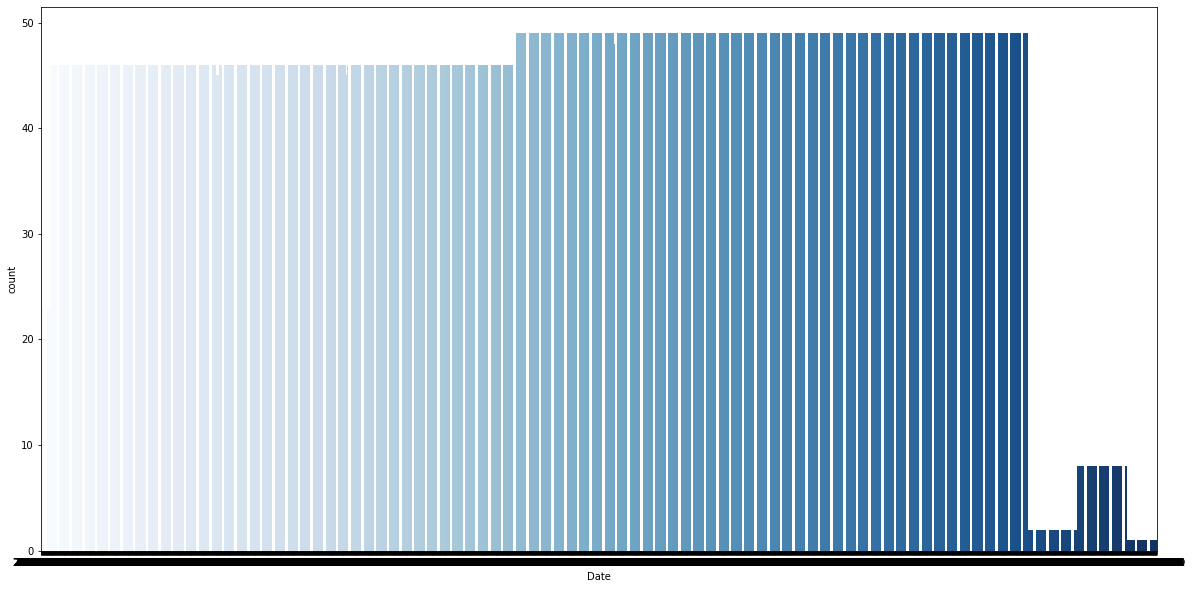

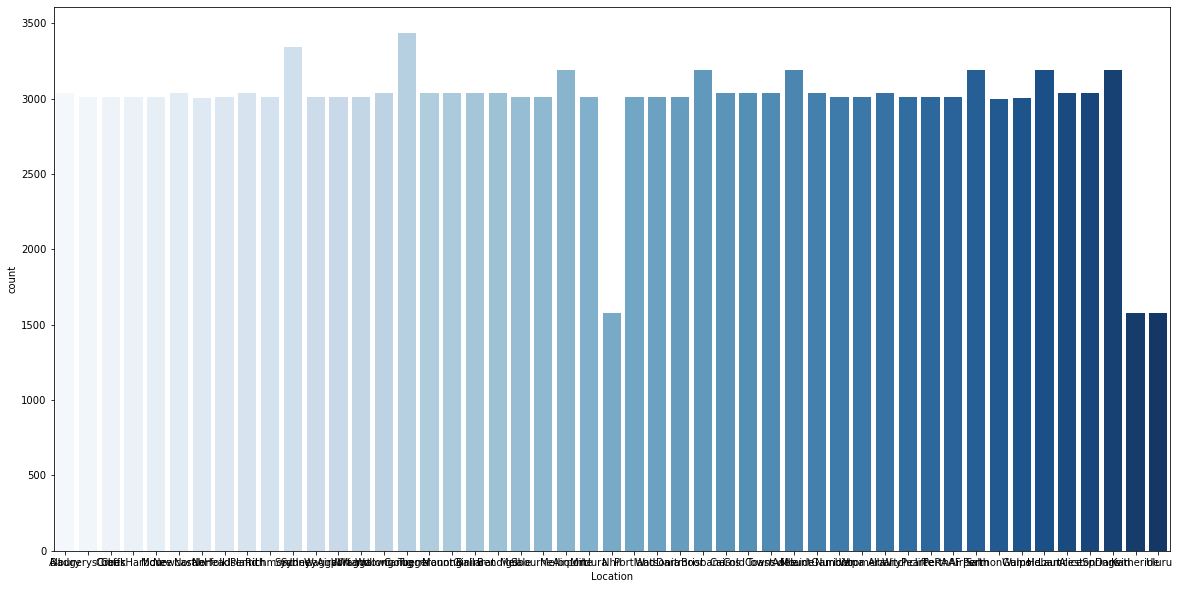

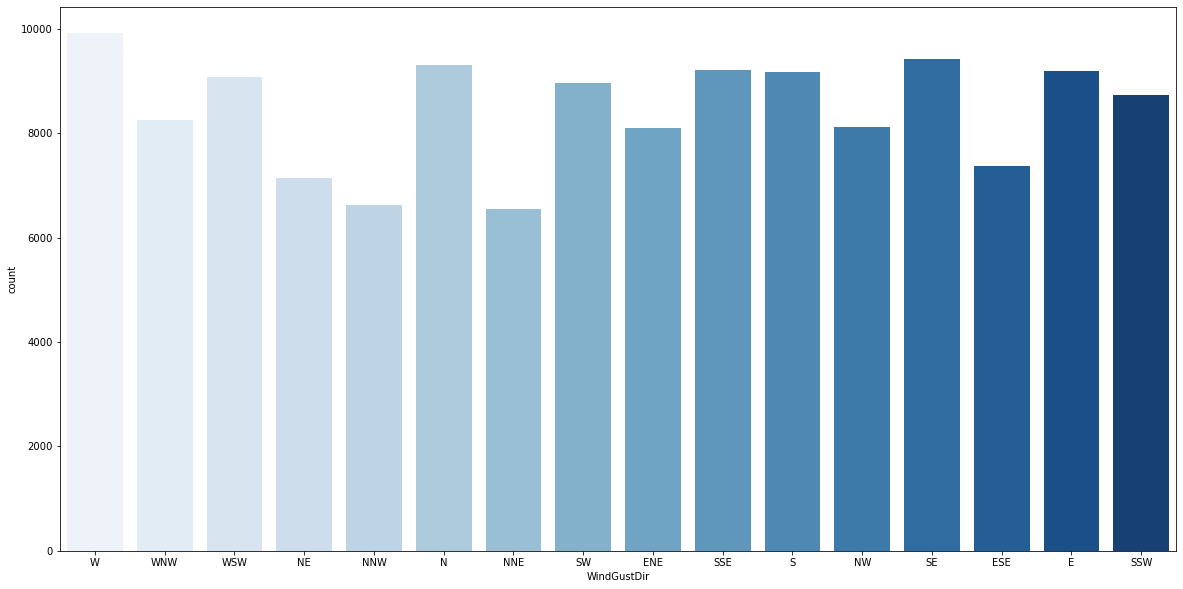

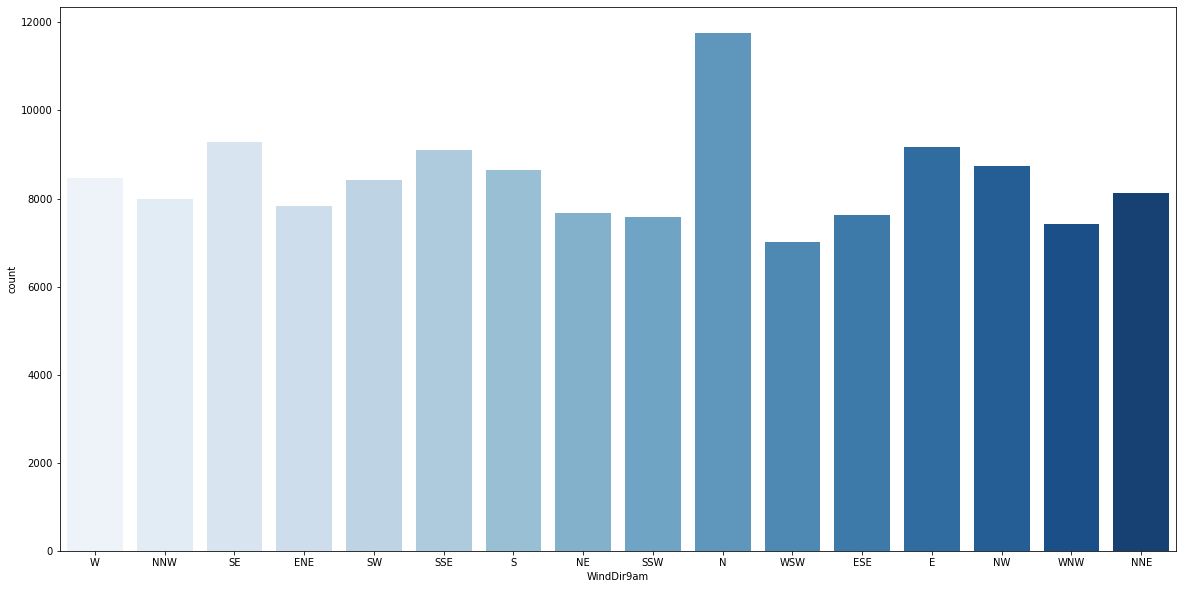

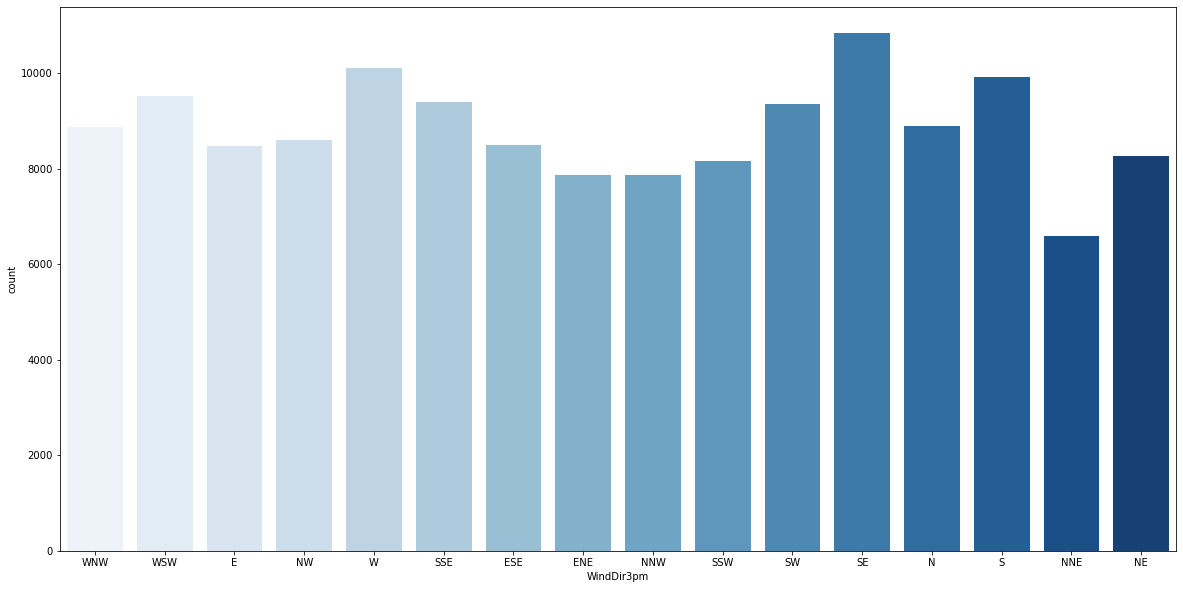

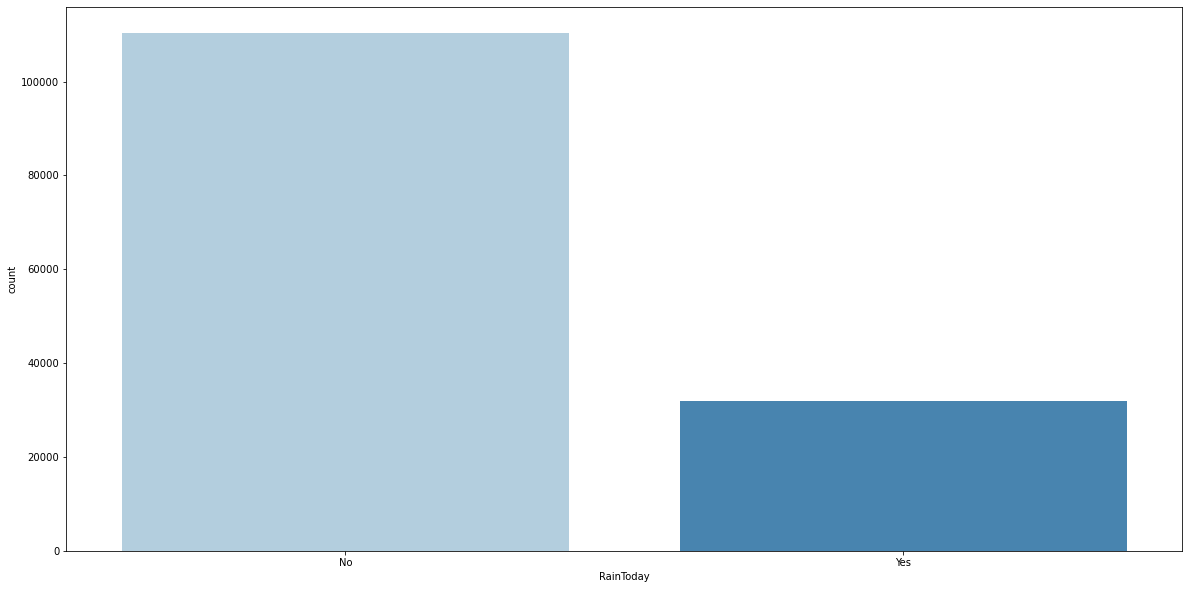

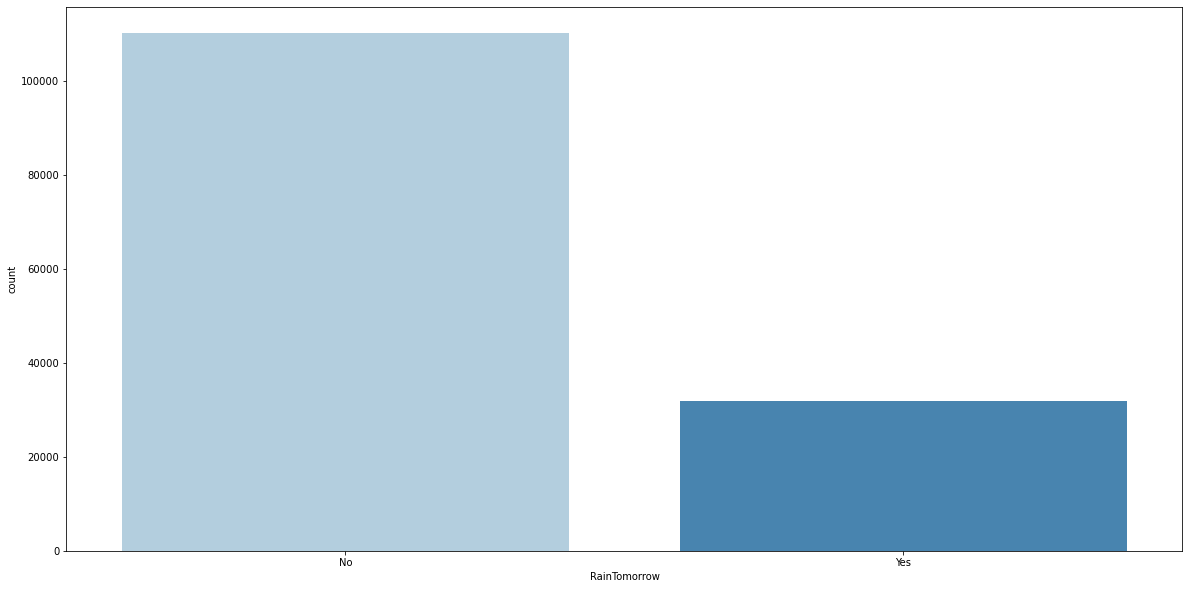

In [10]:
count_plotter(data)

<AxesSubplot:xlabel='count', ylabel='Location'>

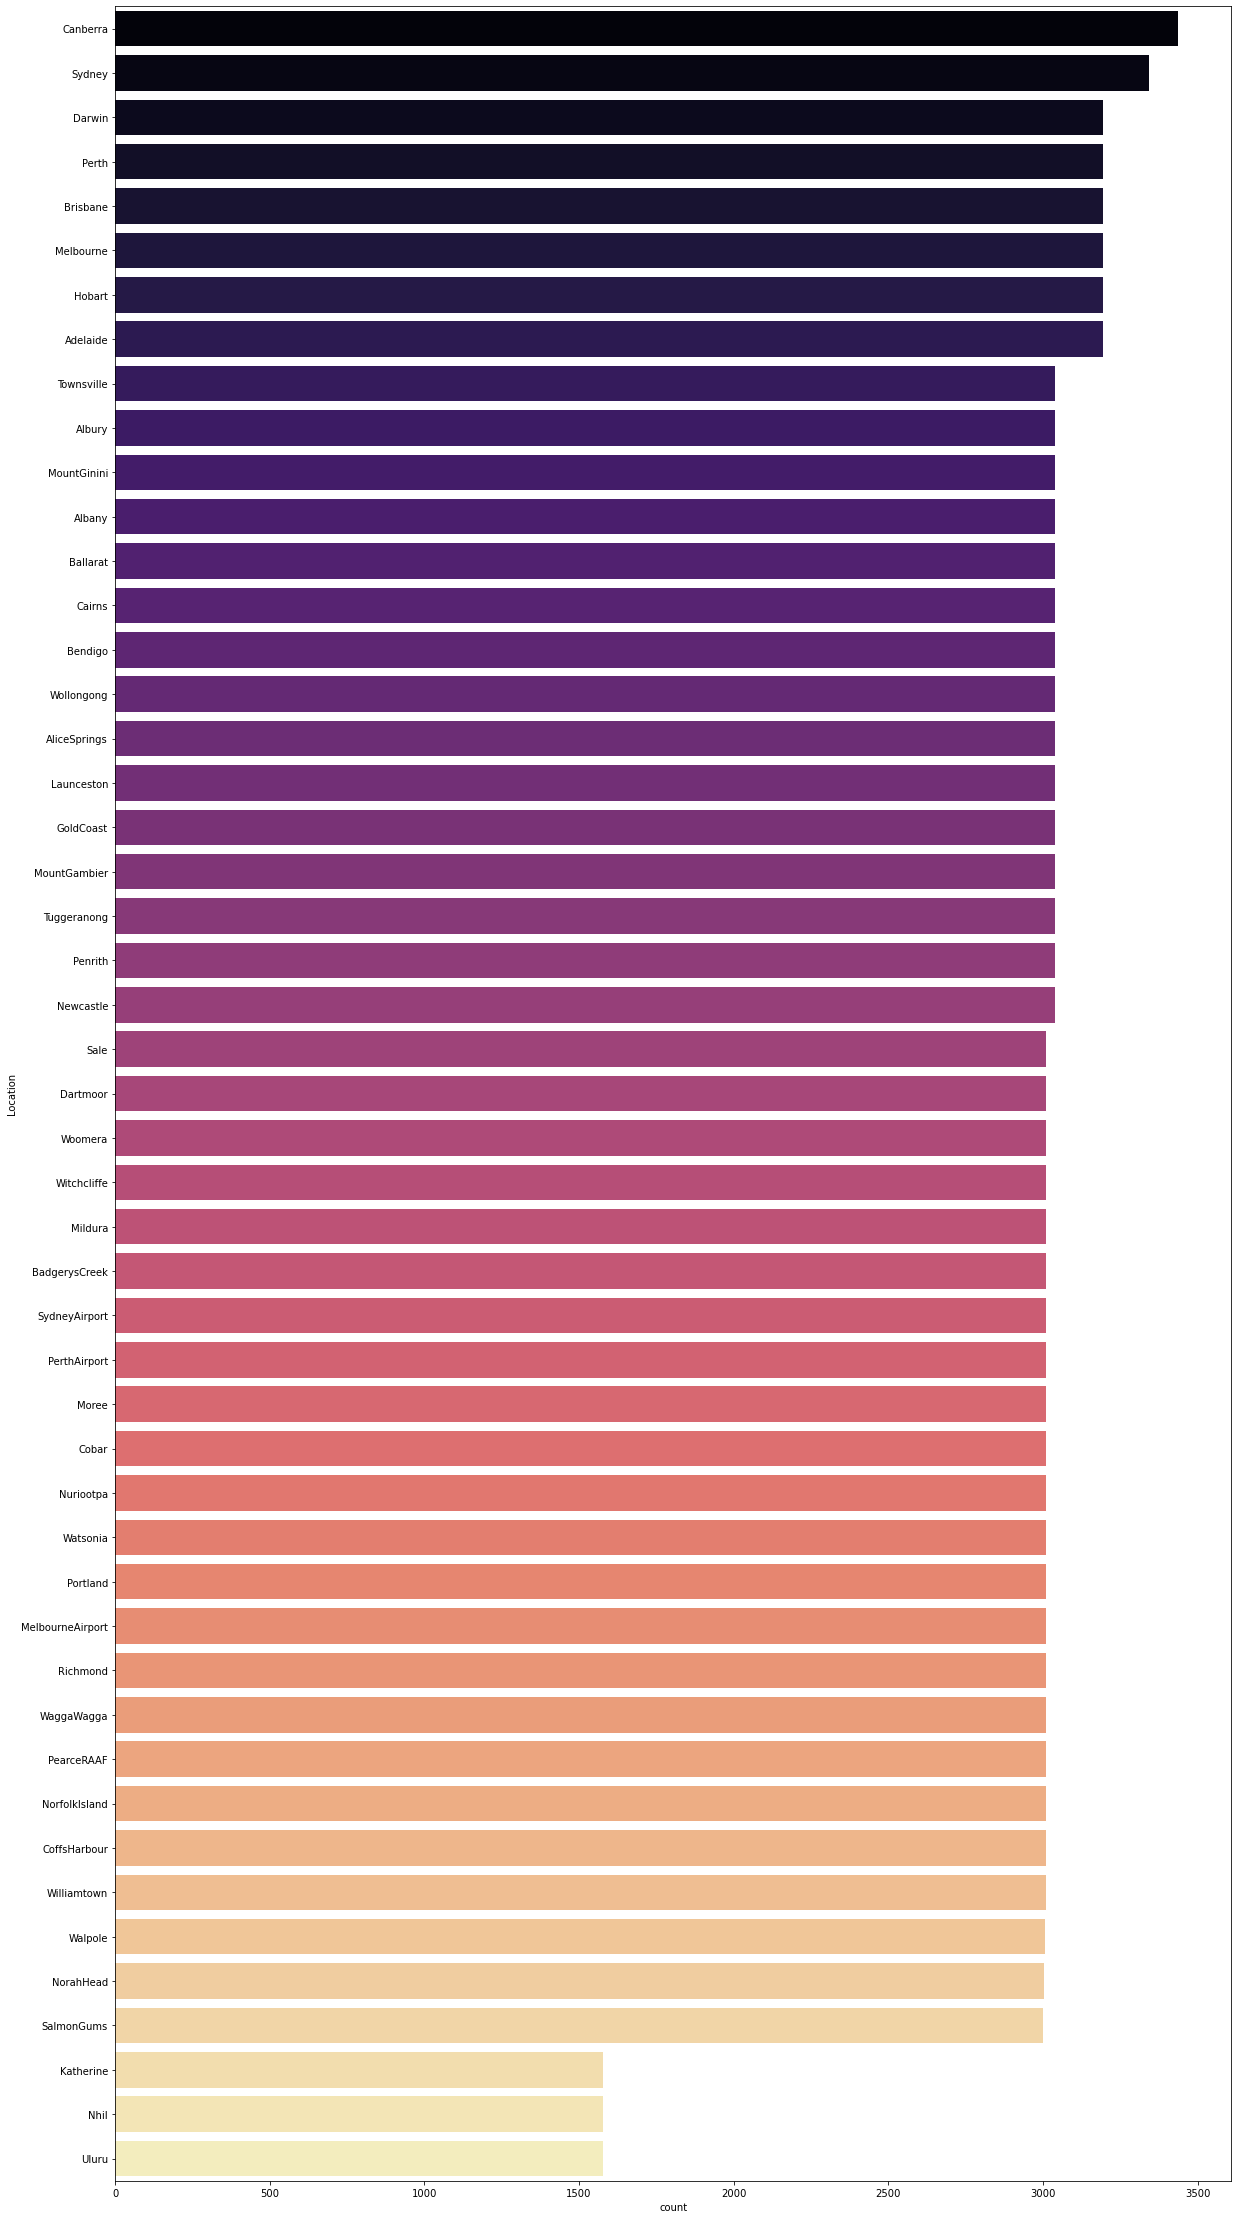

In [11]:
plt.figure(figsize=(20, 40))
sns.countplot(y="Location", data=data, palette = 'magma', order = data['Location'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Location'>

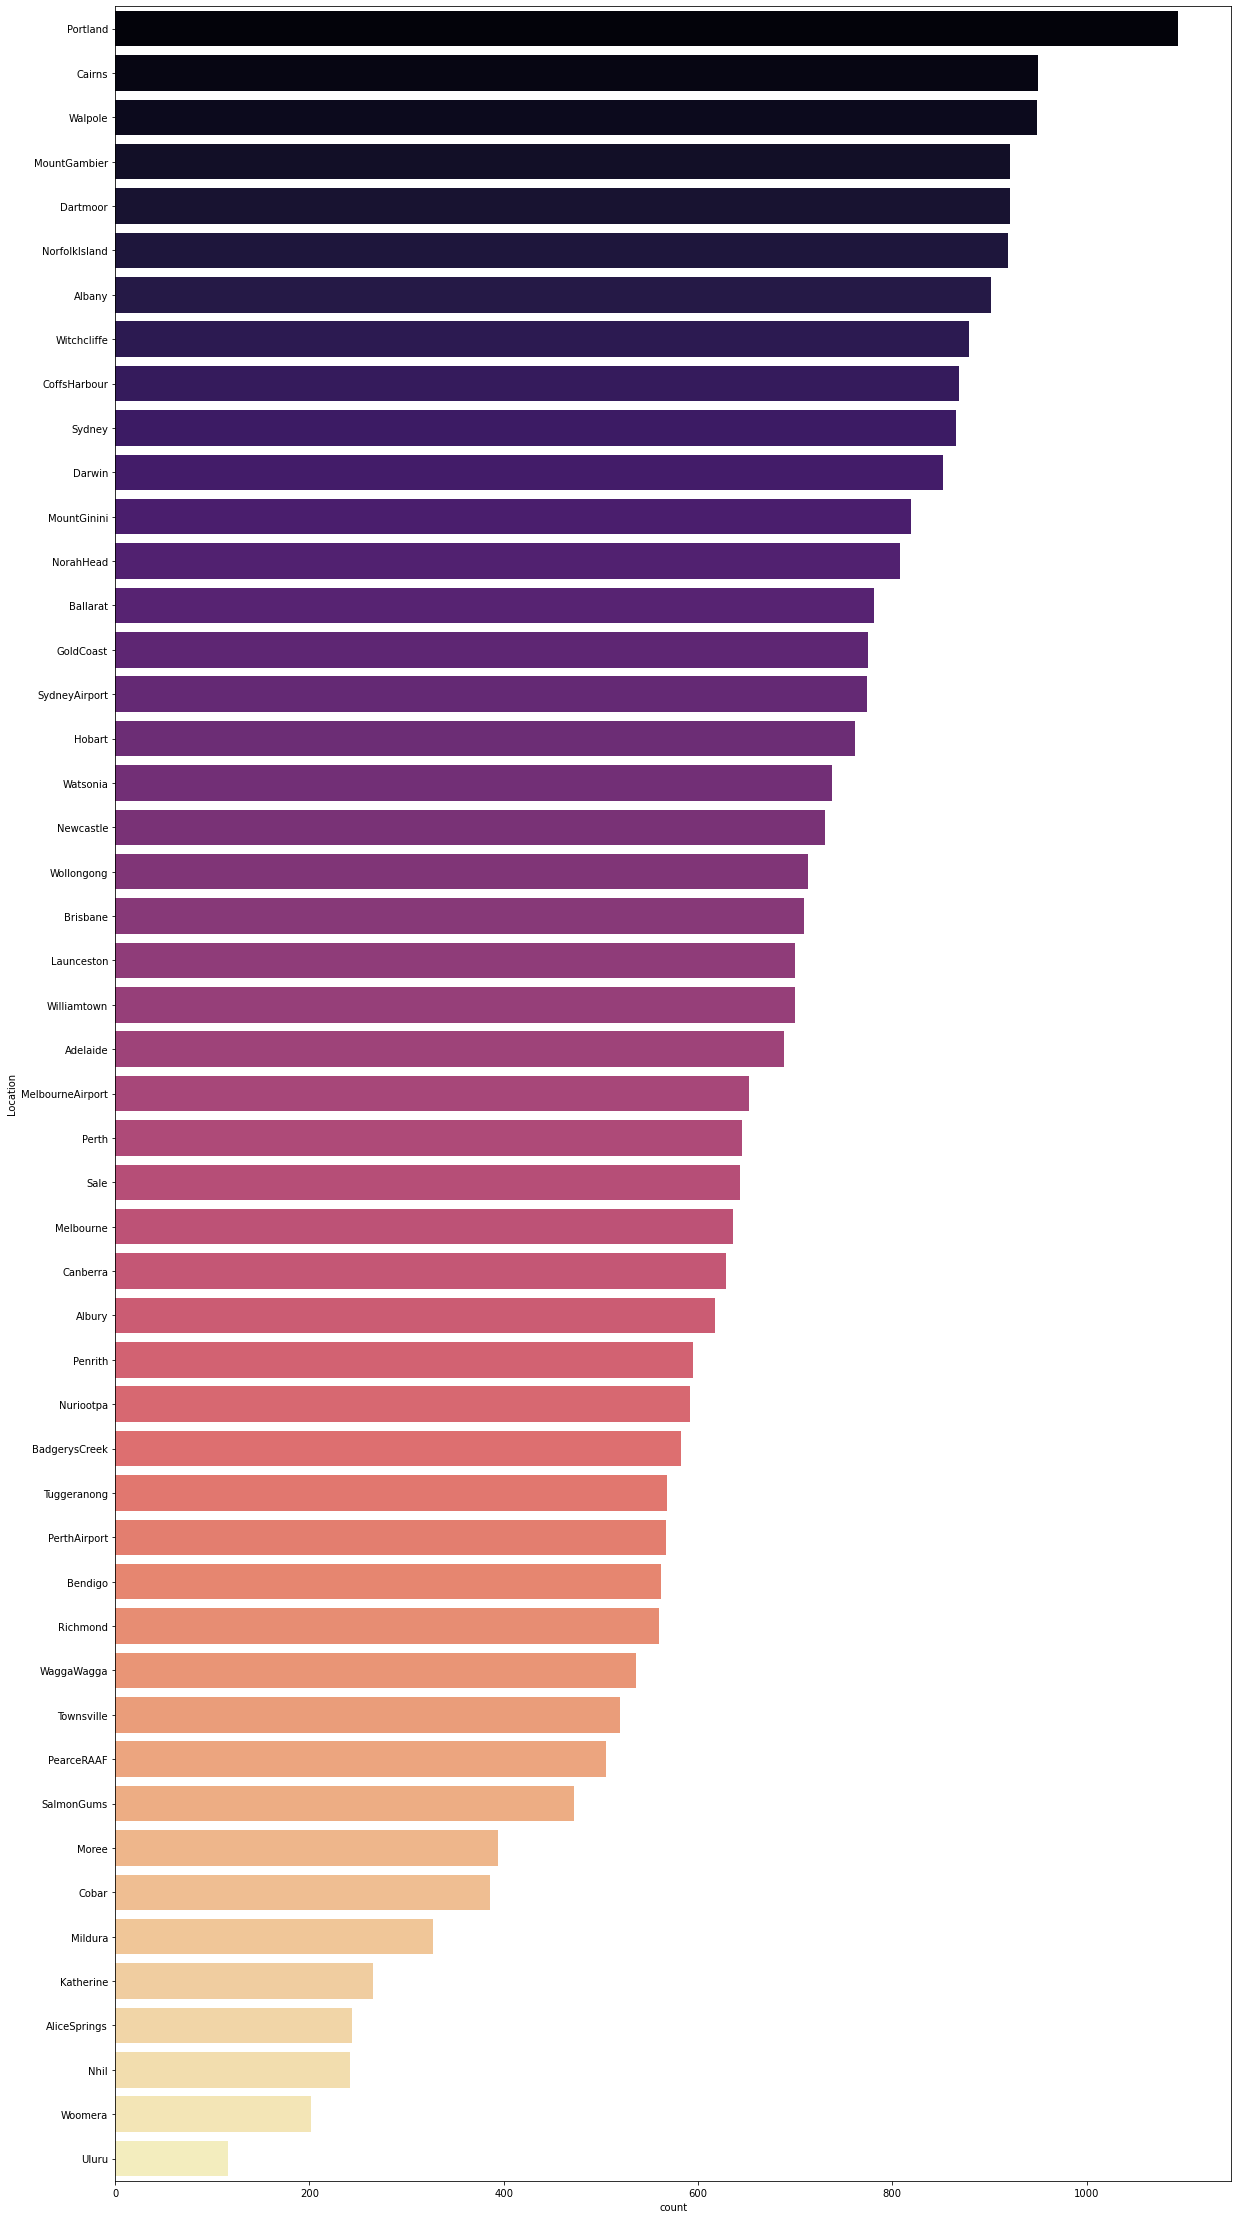

In [51]:
plt.figure(figsize=(20, 40))
sns.countplot(y="Location", data=data[data['RainToday']=='Yes'], palette = 'magma', order = data[data['RainToday']=='Yes']['Location'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Location'>

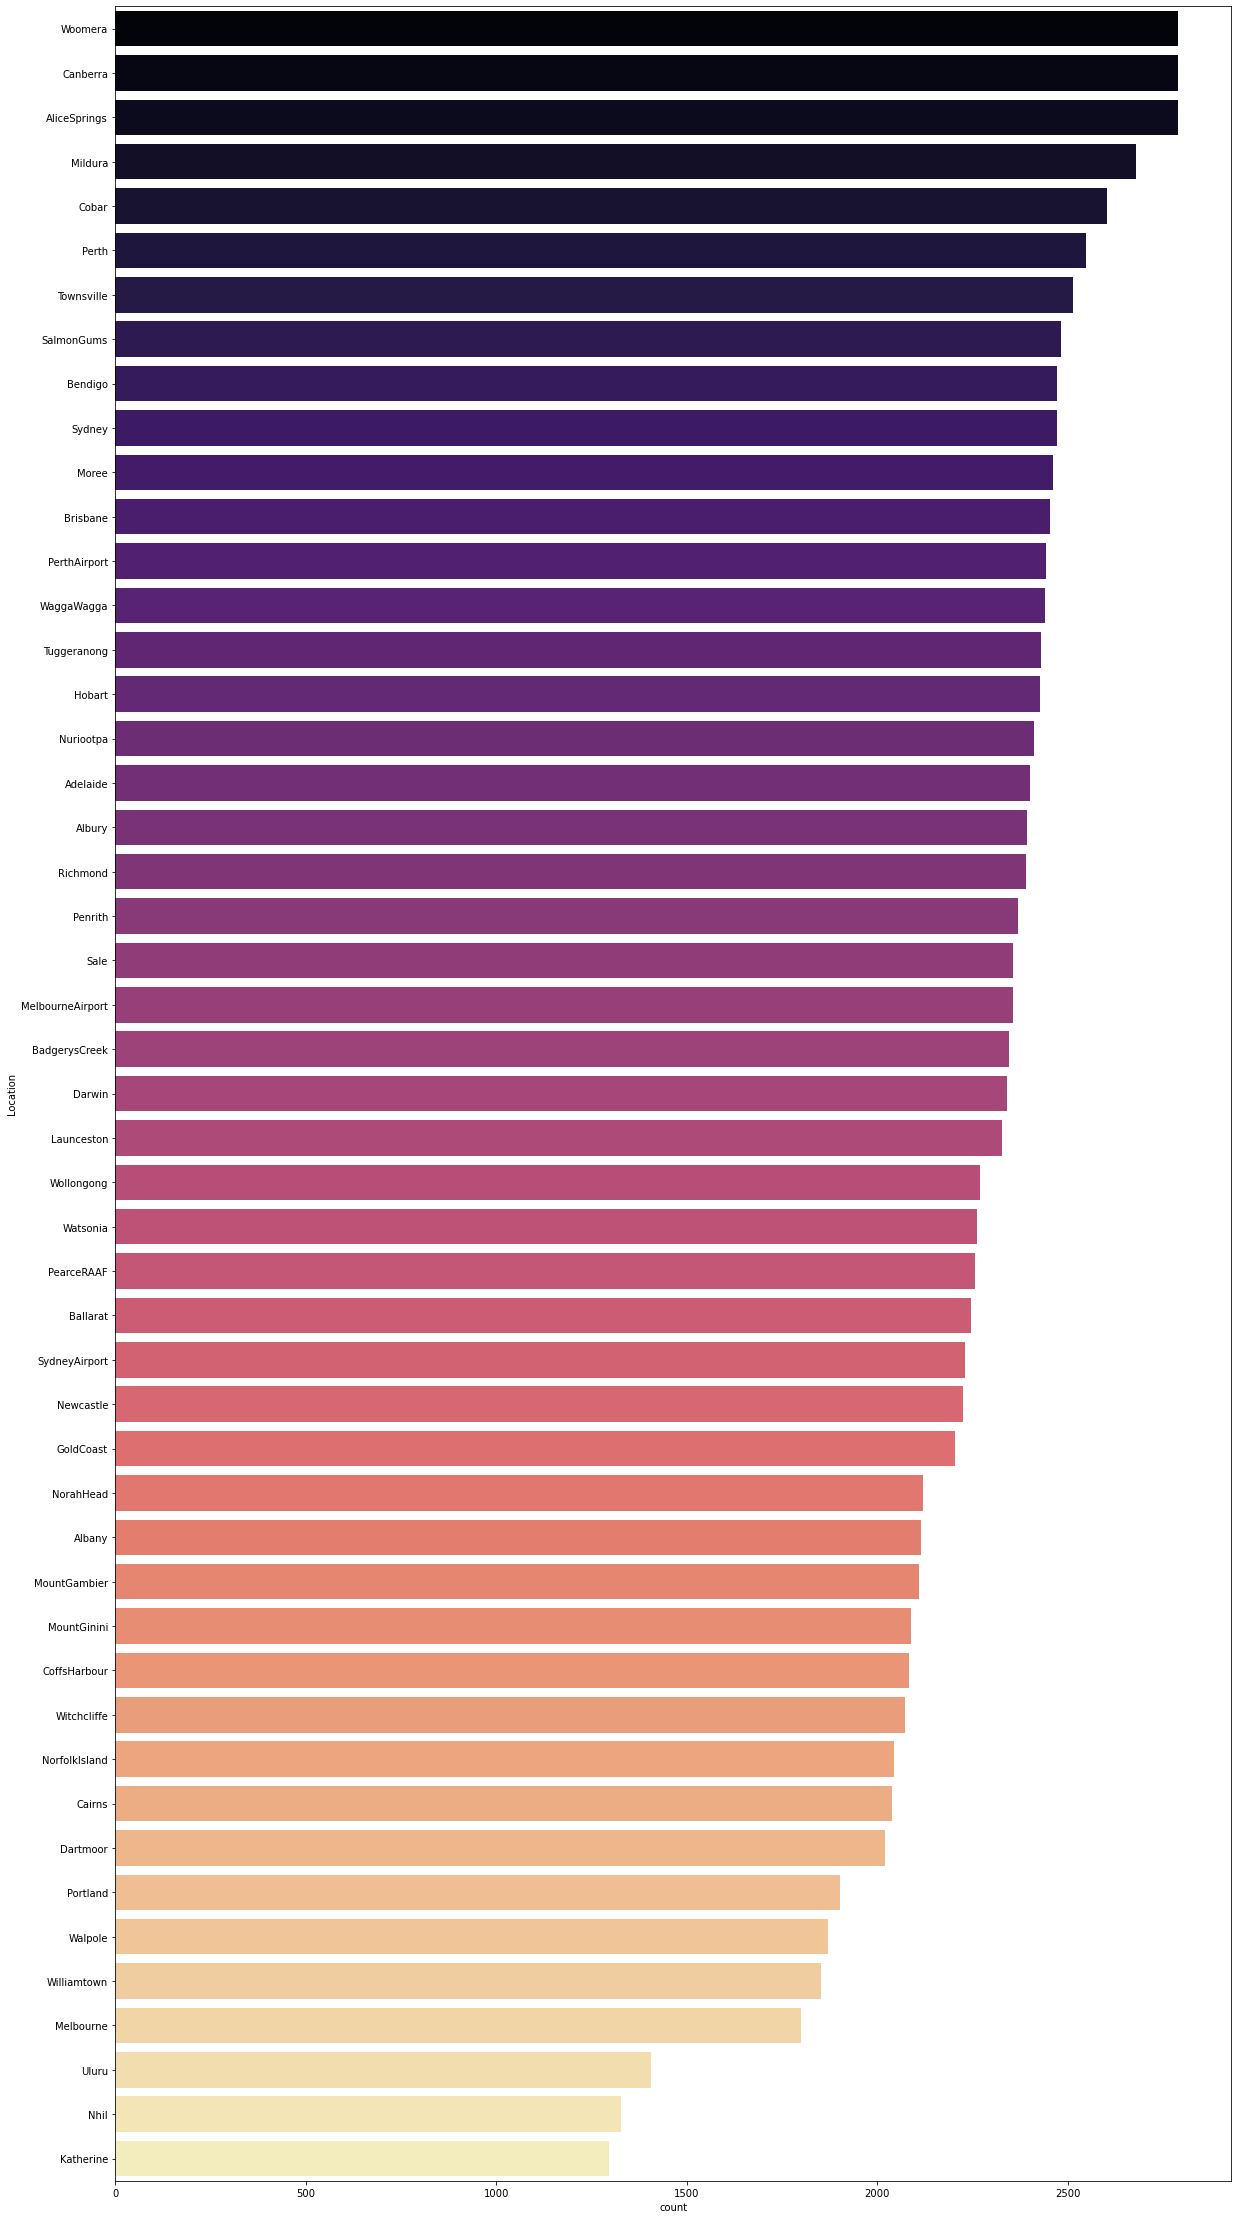

In [53]:
plt.figure(figsize=(20, 40))
sns.countplot(y="Location", data=data[data['RainToday']=='No'], palette = 'magma', order = data[data['RainToday']=='No']['Location'].value_counts().index)

* There are 49 unique locations in the dataset, top 5 locations are Canberra, Sydney, Darwin, Perth and Brisbane.
* Portland, Caims and Walpole receives the highest rainfall on a frequent basis.
* Woomera, Canberra, AliceSprings receive the lowest rainfall on a frequest basis.
* West and South are the directions where most of the wind gust direction data is. 
* Wind direction at 9am is mostly from the North, while wind direction at 3pm changes towards South East. It seems the direction of wind changes from north to south during the day.
* Most of the time, there was no rain during the observation period (78%).
* The next day also observed lower rainfall.

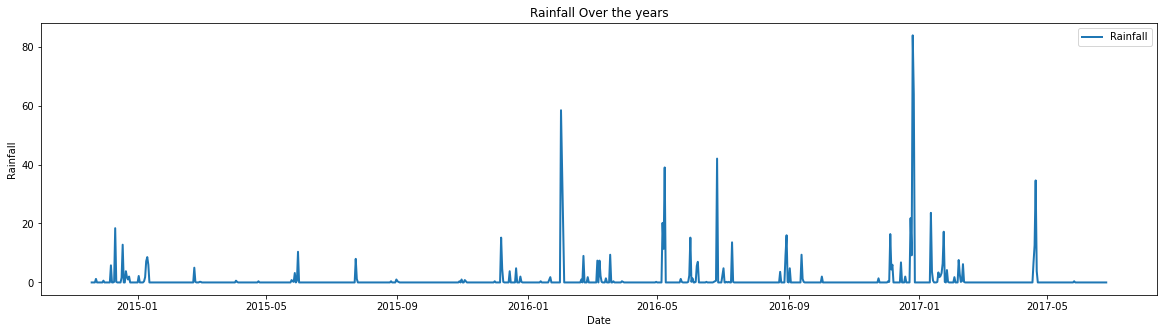

In [13]:
df_date = data.iloc[-950:,:]
plt.figure(figsize=(20,5))
sns.lineplot(x=df_date['Date'],y=df_date['Rainfall'],linewidth=2, label= 'Rainfall')
plt.title('Rainfall Over the years')
plt.show()

* Australia receives maximum rainfall in the beginning of the year, particularly between January to May, highest in January.
* Frequency of rainfall has increased from 2015 to 2017, with the highest rainfall in January 2017.
* Minimal rainfall is experienced during the rest of the year.

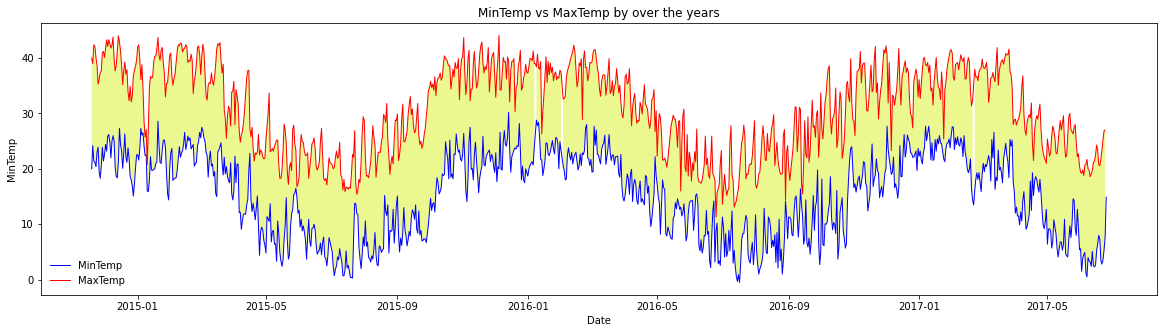

In [14]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
sns.lineplot(x=df_date['Date'],y=df_date['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_date['Date'],df_date['MinTemp'],df_date['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

* Temperature seems to go up in the first quarter of the year (Jan to March) and starts falling after April with the lowest in August.
* Australia experiences winters in the month of July to October and this can be seen from the plot.
* The max and min temperature has remained somewhat constant over the years without changing much.

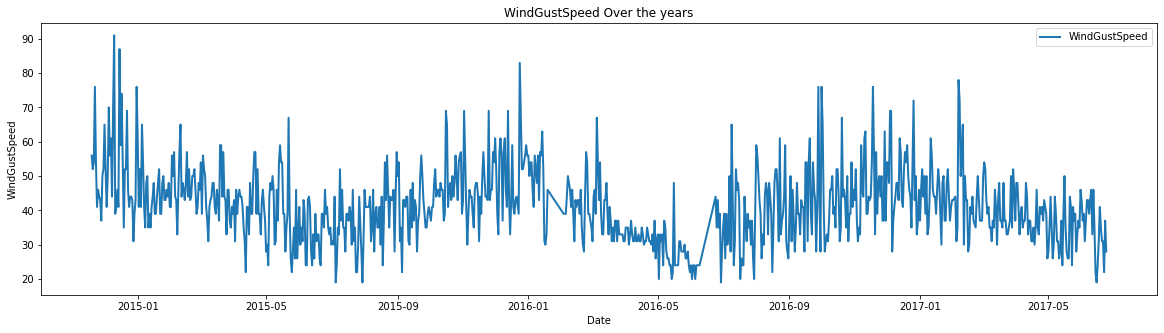

In [15]:
df_date = data.iloc[-950:,:]
plt.figure(figsize=(20,5))
sns.lineplot(x=df_date['Date'],y=df_date['WindGustSpeed'],linewidth=2, label= 'WindGustSpeed')
plt.title('WindGustSpeed Over the years')
plt.show()

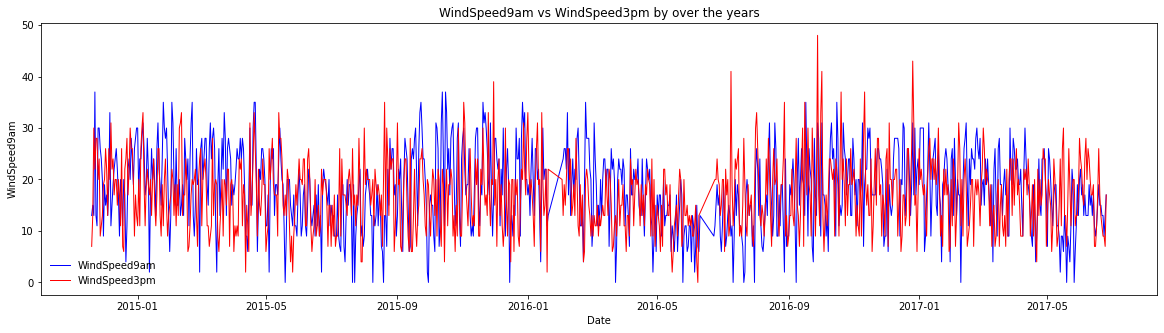

In [16]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['WindSpeed9am'],color='blue',linewidth=1, label= 'WindSpeed9am')
sns.lineplot(x=df_date['Date'],y=df_date['WindSpeed3pm'],color='red',linewidth=1, label= 'WindSpeed3pm')
plt.title('WindSpeed9am vs WindSpeed3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

* Australia experiences faster wind speeds in the summer periods with highest wind speeds in December-January period.
* Wind speeds usually come down during the winter season with lowest in June-July period.
* Overall wind speeds ahve declined over the observation period.
* Wind speeds are usually higher at 3pm compared to 9am.
* Afternoon wind speeds have increased over the observation period.

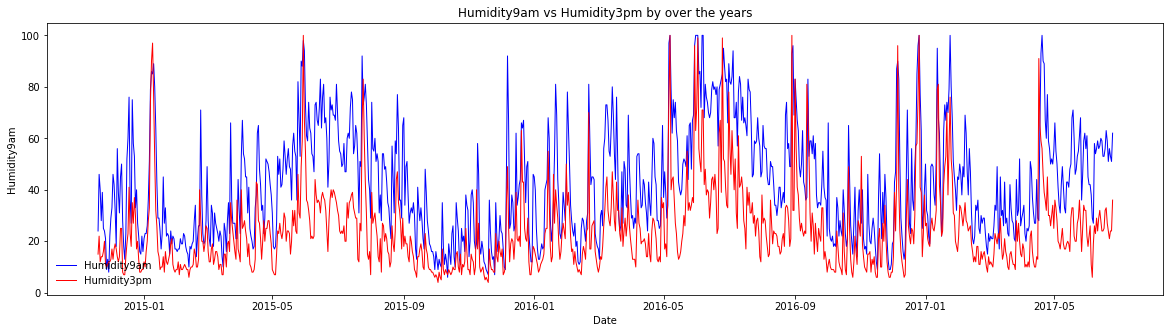

In [17]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['Humidity9am'],color='blue',linewidth=1, label= 'Humidity9am')
sns.lineplot(x=df_date['Date'],y=df_date['Humidity3pm'],color='red',linewidth=1, label= 'Humidity3pm')
plt.title('Humidity9am vs Humidity3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

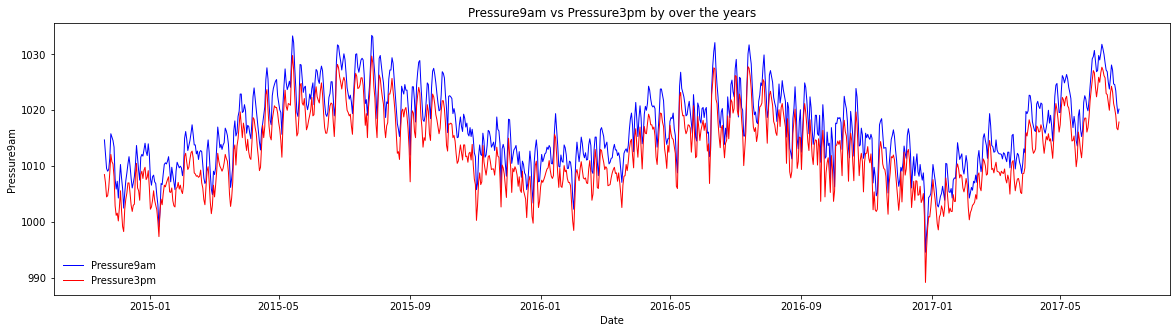

In [18]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['Pressure9am'],color='blue',linewidth=1, label= 'Pressure9am')
sns.lineplot(x=df_date['Date'],y=df_date['Pressure3pm'],color='red',linewidth=1, label= 'Pressure3pm')
plt.title('Pressure9am vs Pressure3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

* Humidity levels have remained constant over the observation period with 3pm humidity spiking in the winter months.
* Pressure levels have remained constant over the observation period with humidity spiking in the winter months.

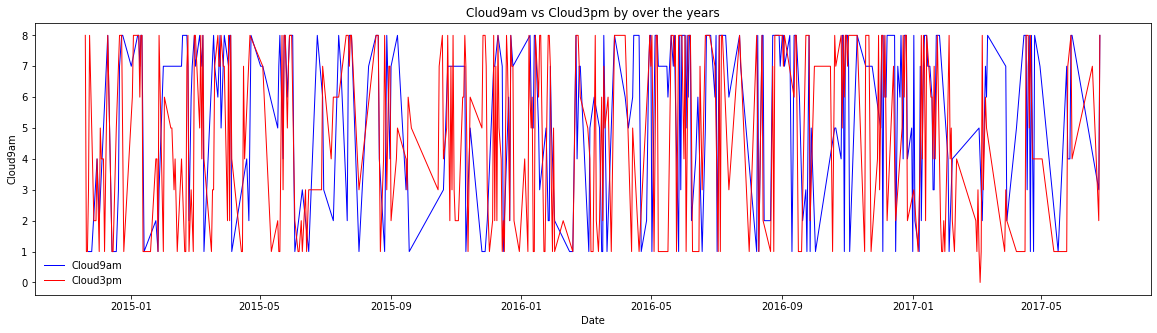

In [19]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['Cloud9am'],color='blue',linewidth=1, label= 'Cloud9am')
sns.lineplot(x=df_date['Date'],y=df_date['Cloud3pm'],color='red',linewidth=1, label= 'Cloud3pm')
plt.title('Cloud9am vs Cloud3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

* The Cloud information does not present any useful information based on the patterns, so no insights can be developed.
* As a result, we will drop the cloud attributes to improve the dataset.

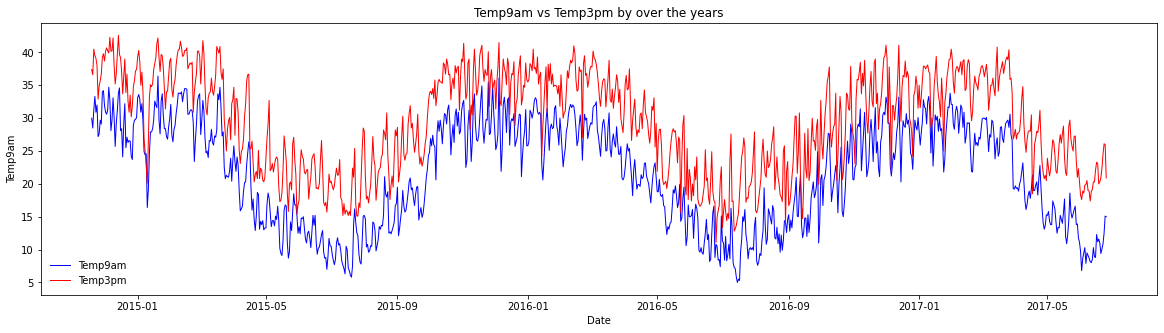

In [20]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['Temp9am'],color='blue',linewidth=1, label= 'Temp9am')
sns.lineplot(x=df_date['Date'],y=df_date['Temp3pm'],color='red',linewidth=1, label= 'Temp3pm')
plt.title('Temp9am vs Temp3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

* Temperature levels at 9am and 3pm have remained constant over the observation period.
* Afternoons are usually hotter, peaking in the summer months of Jan to Mar.

In [21]:
grouped_df = data.groupby("Location").mean()

In [22]:
grouped_df.reset_index(inplace = True)

In [23]:
grouped_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,Adelaide,12.579505,22.898934,1.566354,5.770364,7.747993,36.499211,9.950125,15.471455,59.701066,44.828105,1018.764082,1016.803264,NaN,NaN,16.929046,21.557447
1,Albany,12.948438,20.070998,2.263859,4.213345,6.657460,NaN,12.503189,18.993498,74.805416,67.407917,1018.275721,1016.497280,5.191539,4.808072,16.236455,18.411555
2,Albury,9.530604,22.640872,1.914115,NaN,NaN,32.977394,8.211151,14.382965,74.070604,47.869393,1018.369621,1015.760752,6.391001,5.406447,14.361135,21.373780
3,AliceSprings,13.142284,29.248420,0.882850,9.026832,9.581944,40.531281,14.727452,18.101053,39.690155,24.131466,1016.684732,1012.871913,2.845898,3.251213,21.335658,28.010764
4,BadgerysCreek,11.131719,24.031208,2.193101,NaN,NaN,33.600409,8.051351,14.005404,76.895770,51.381855,1018.461598,1015.635120,NaN,NaN,16.571698,22.522698


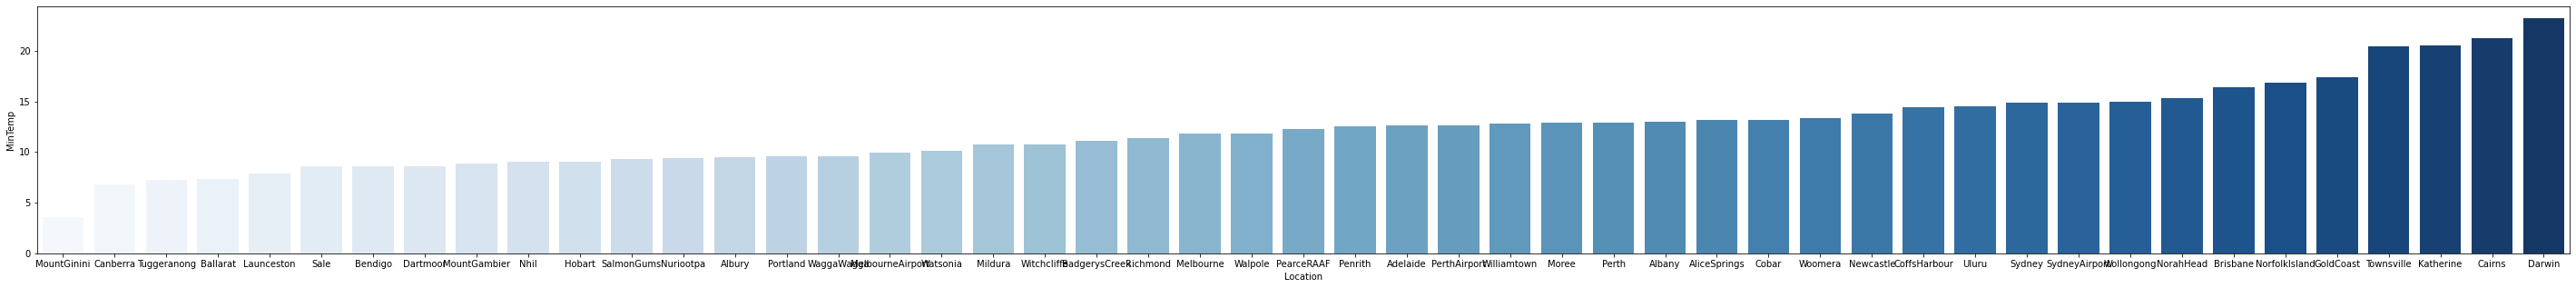

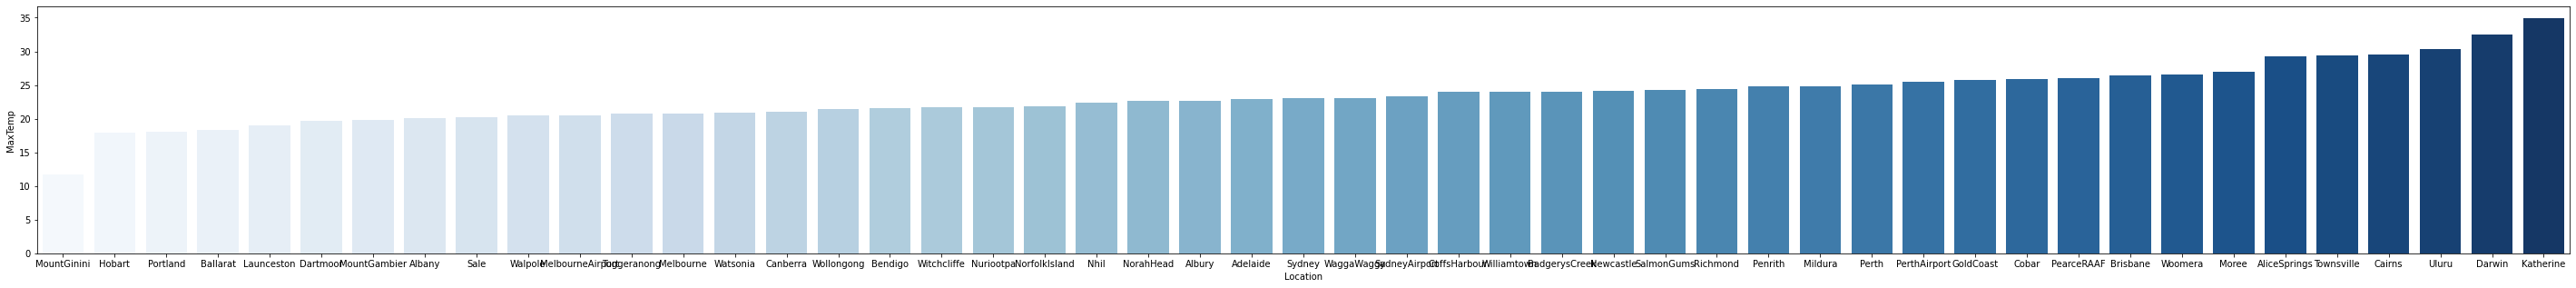

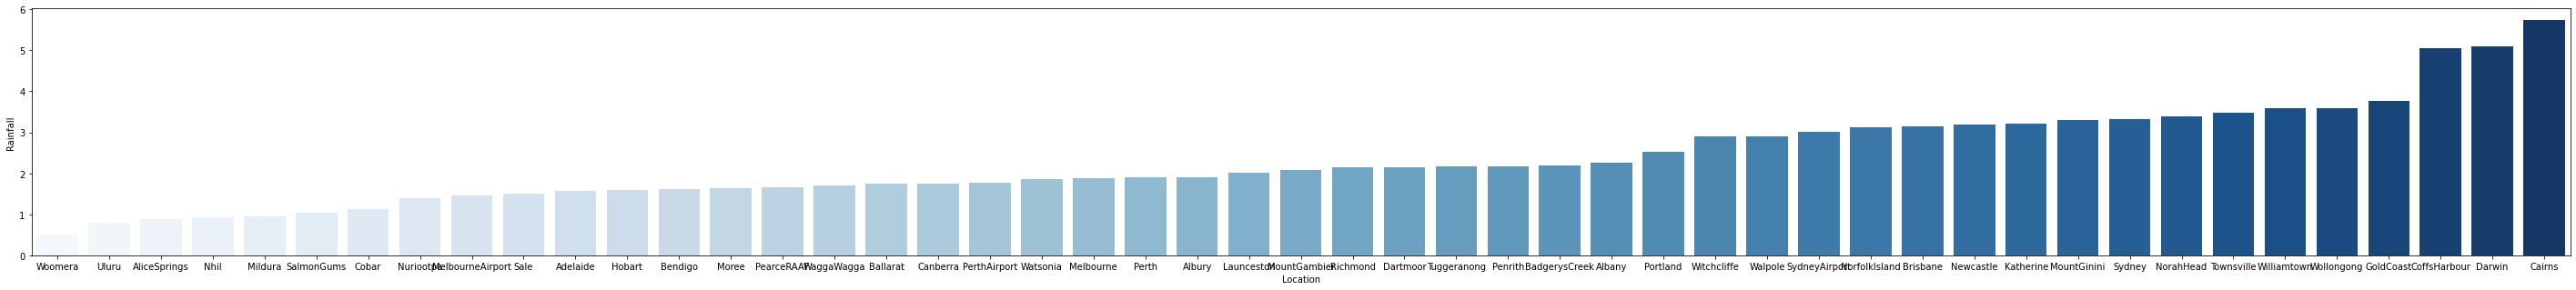

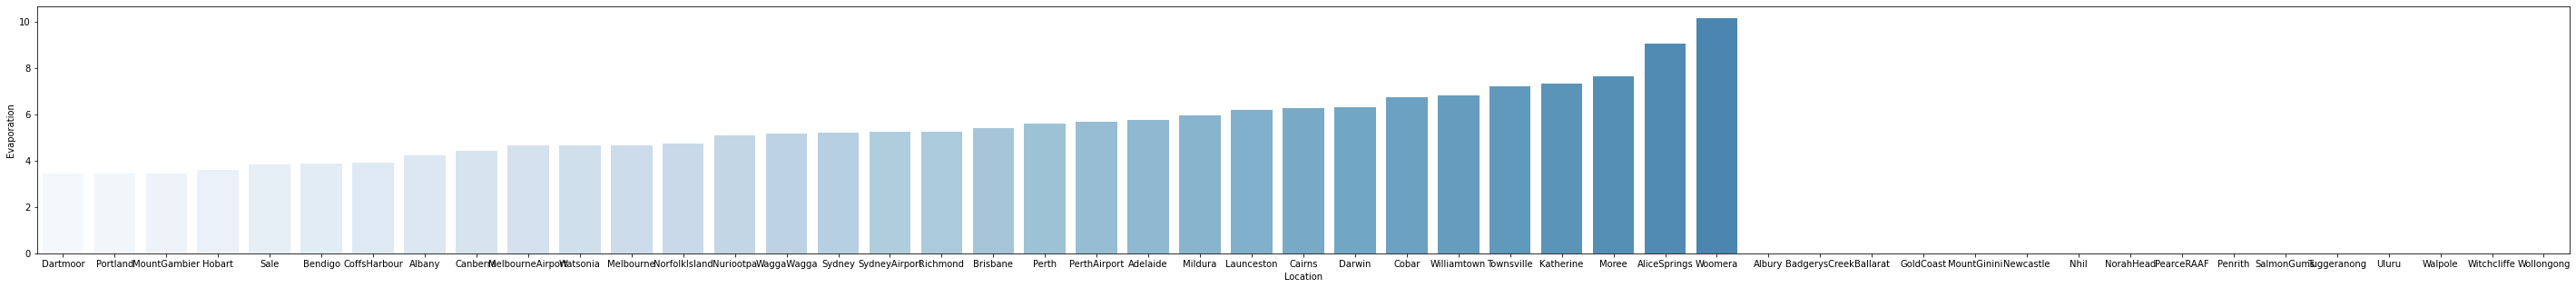

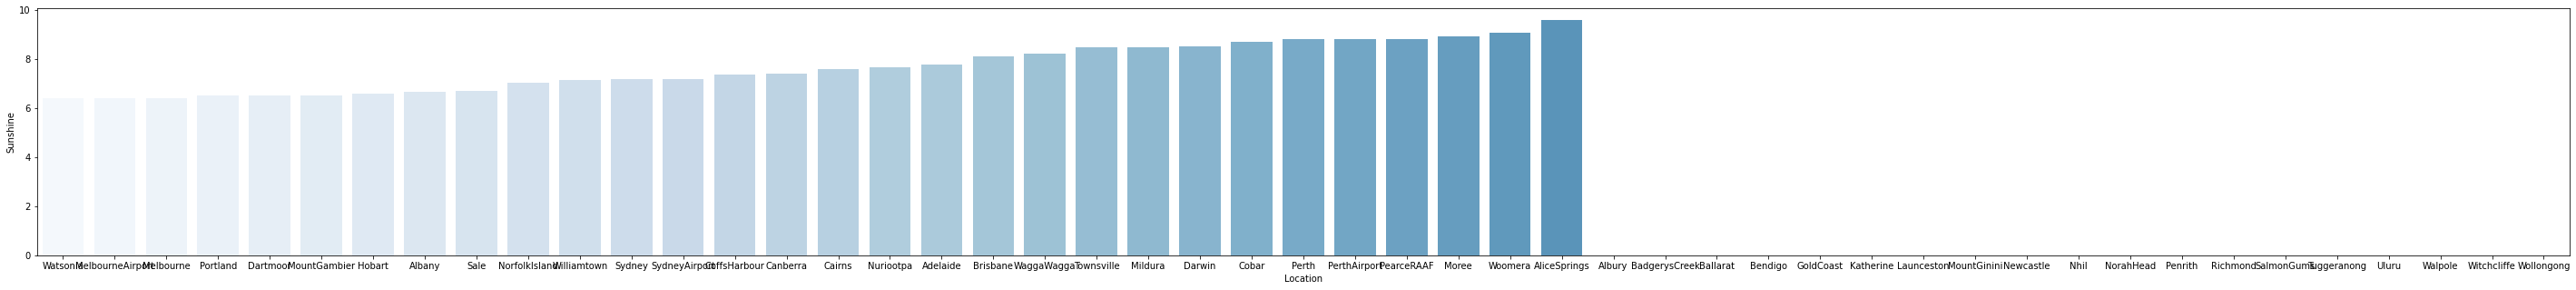

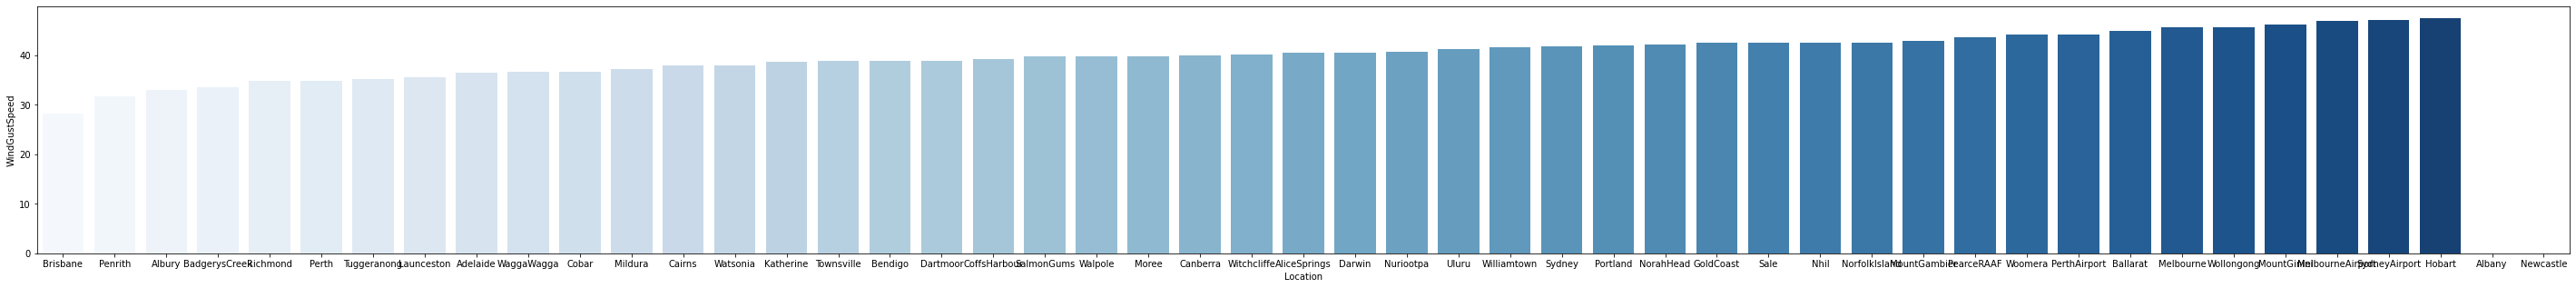

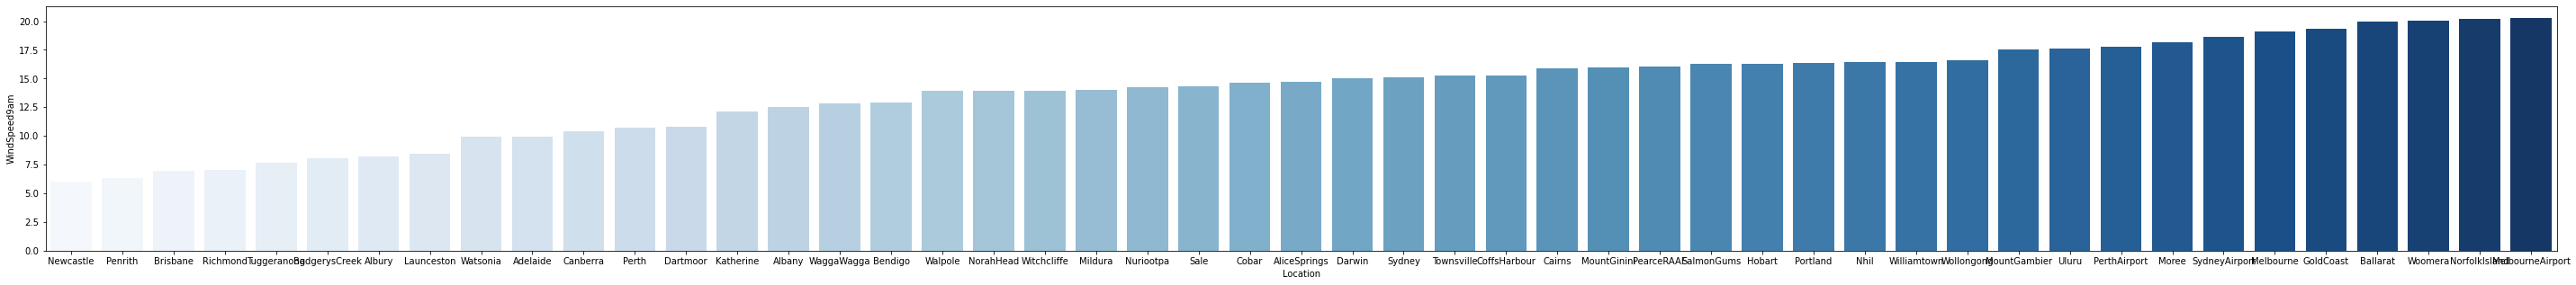

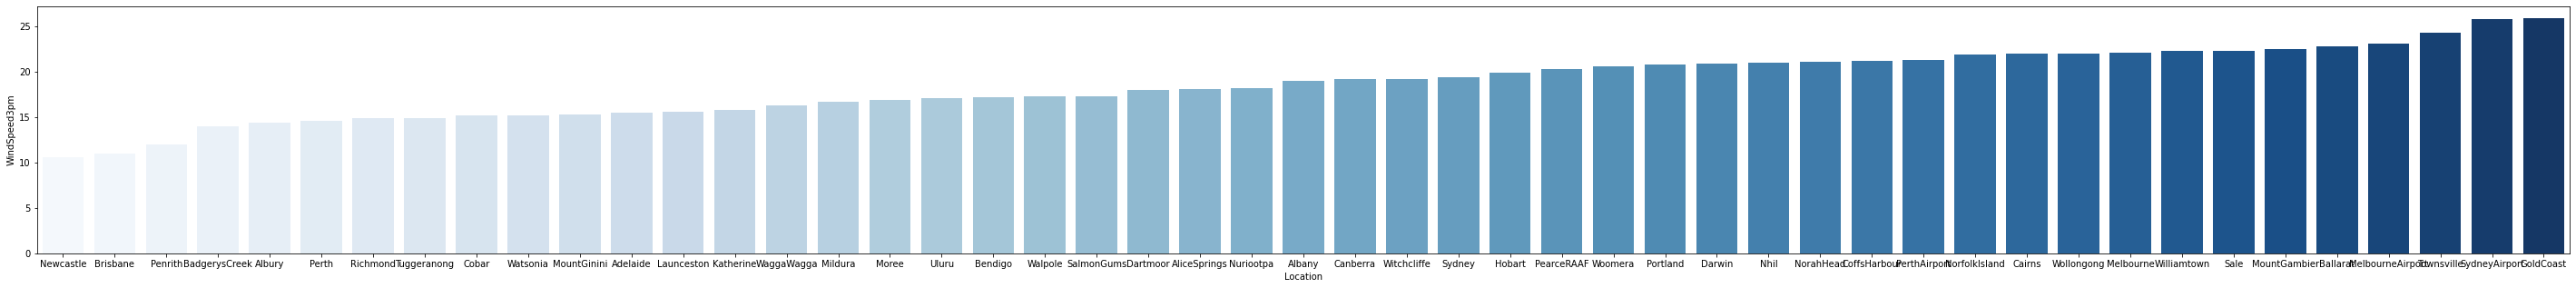

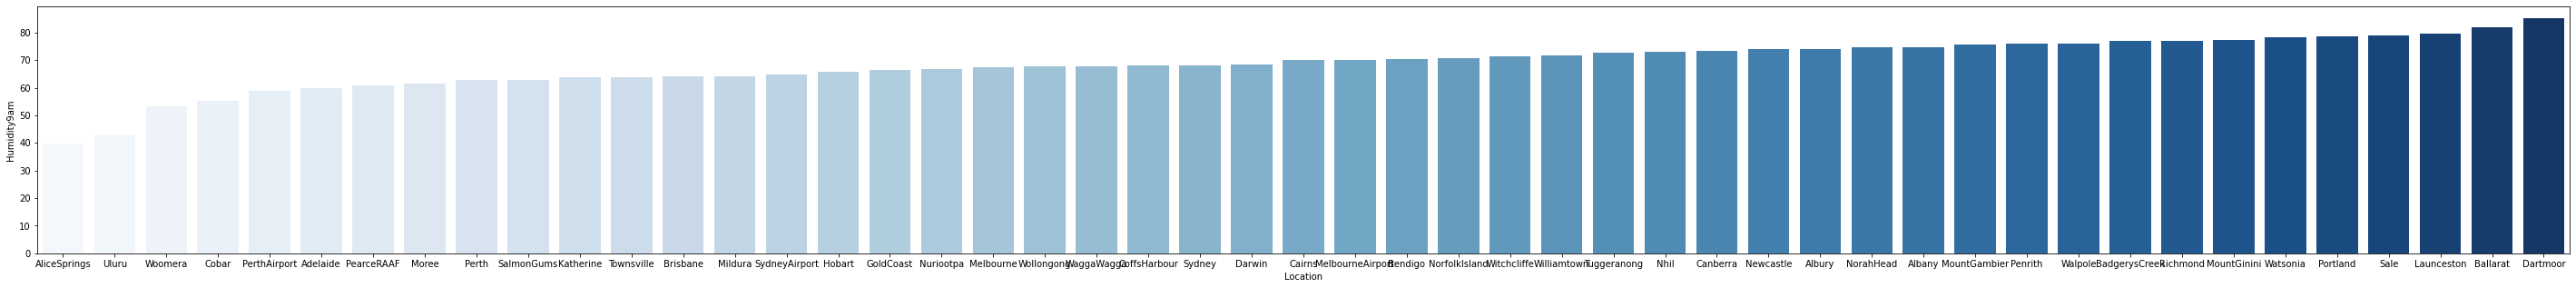

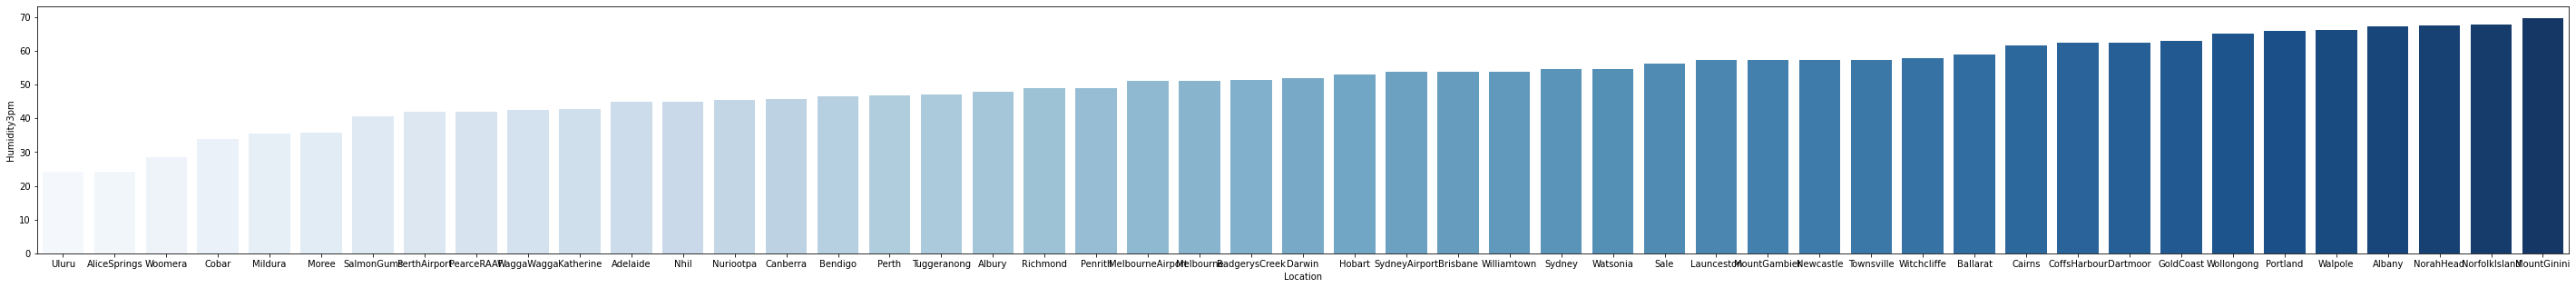

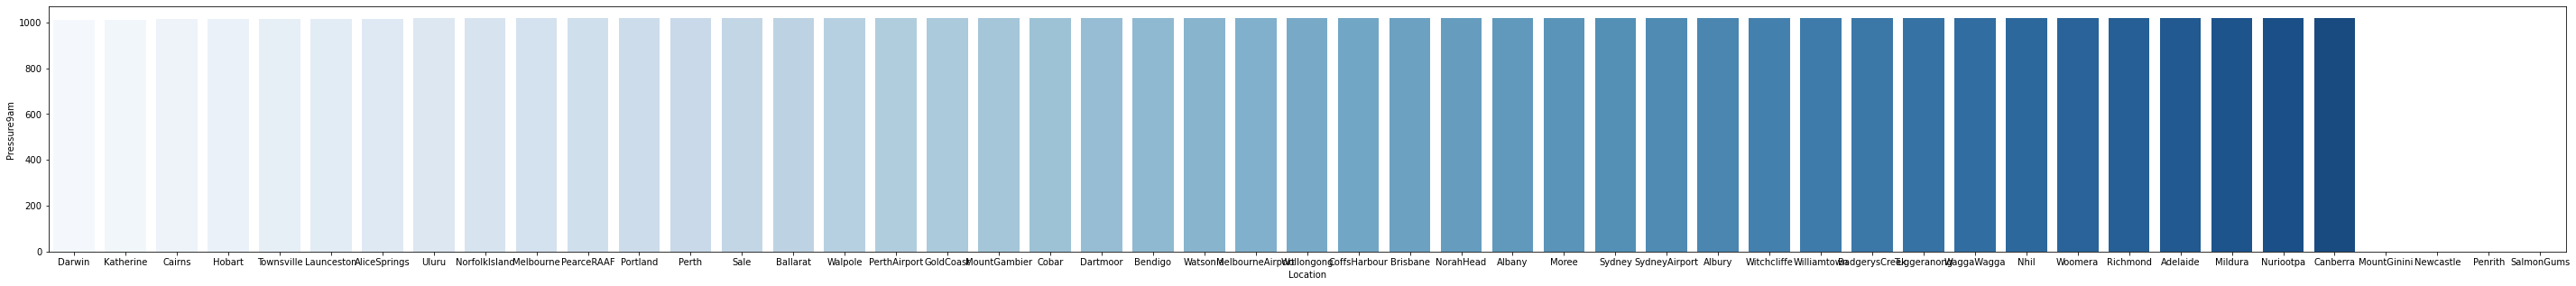

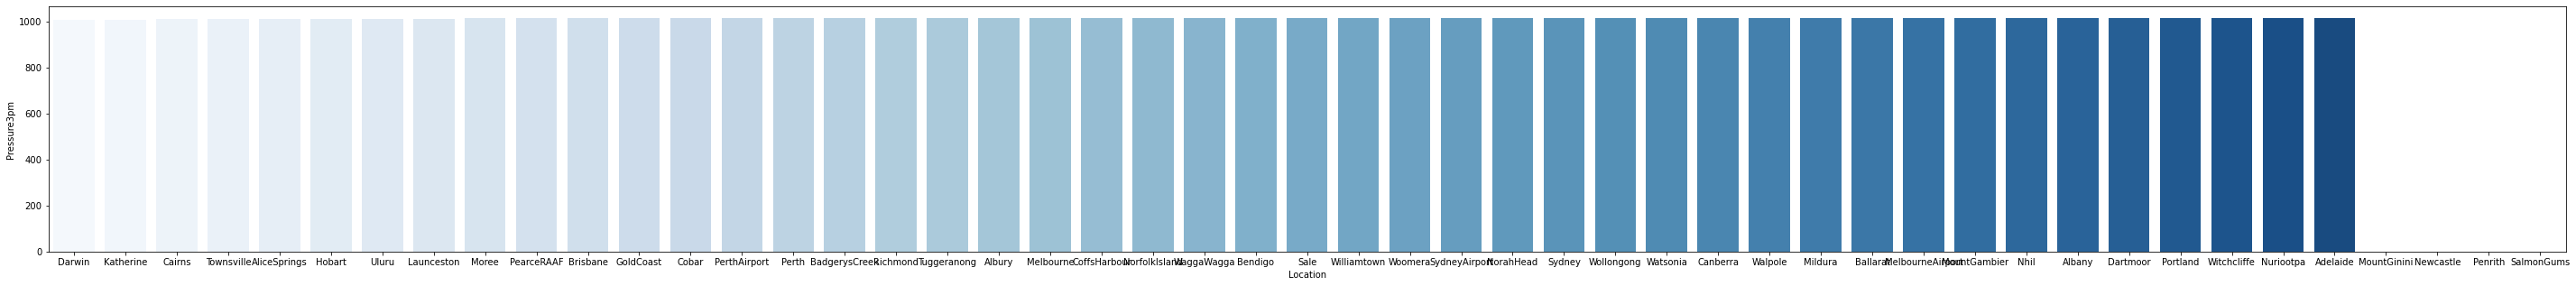

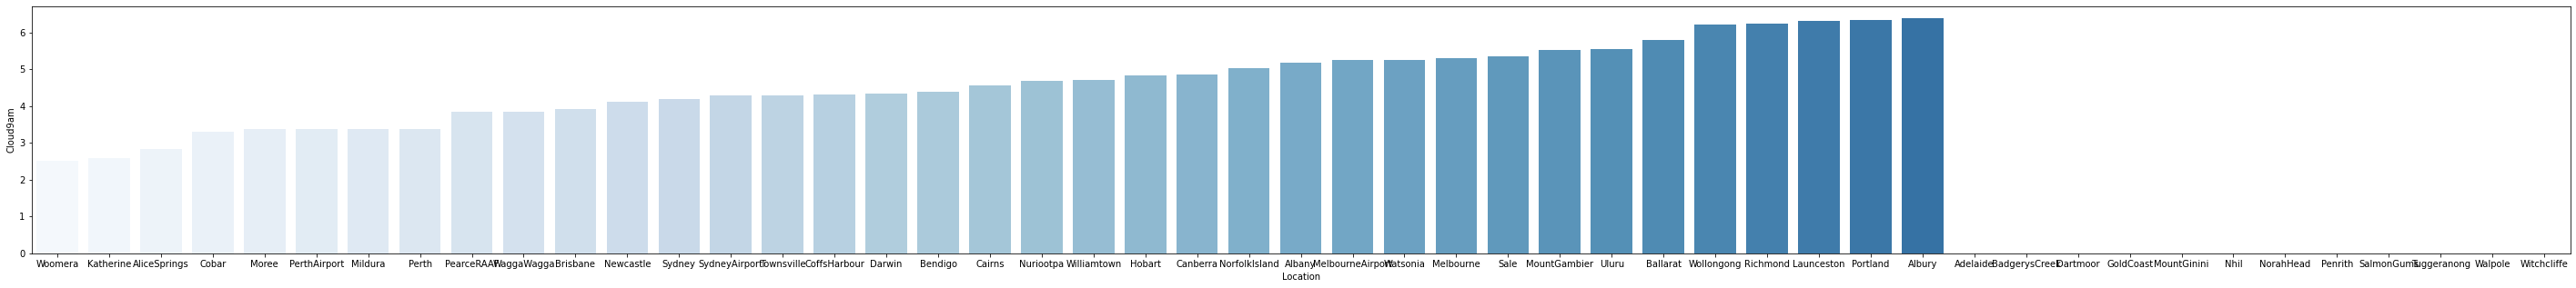

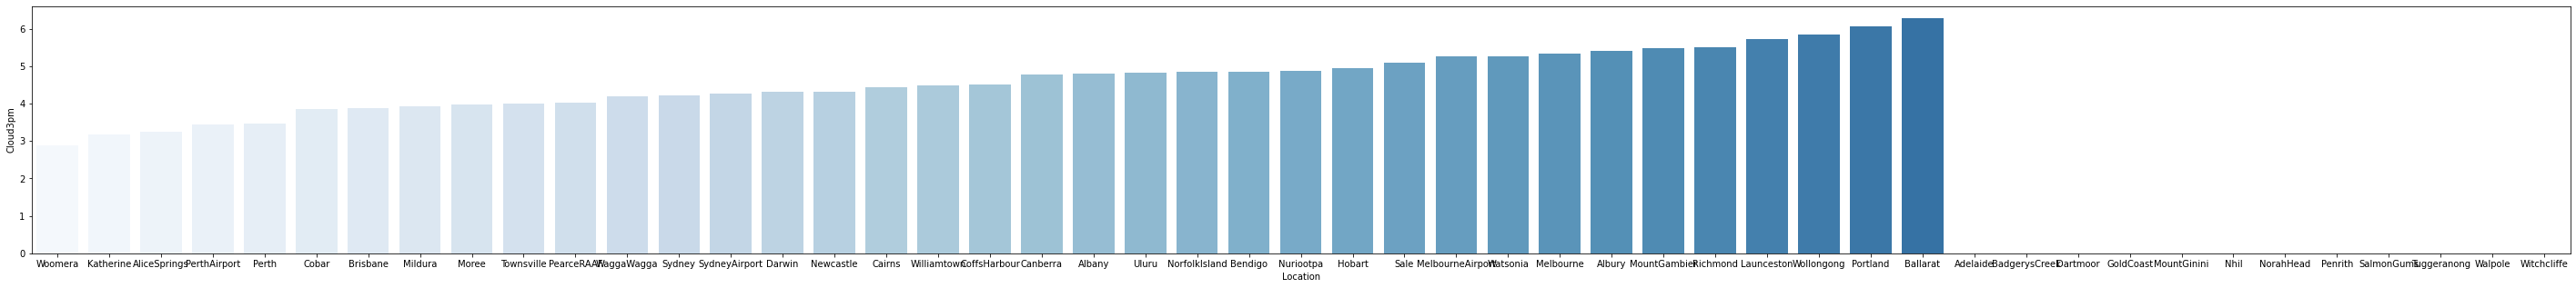

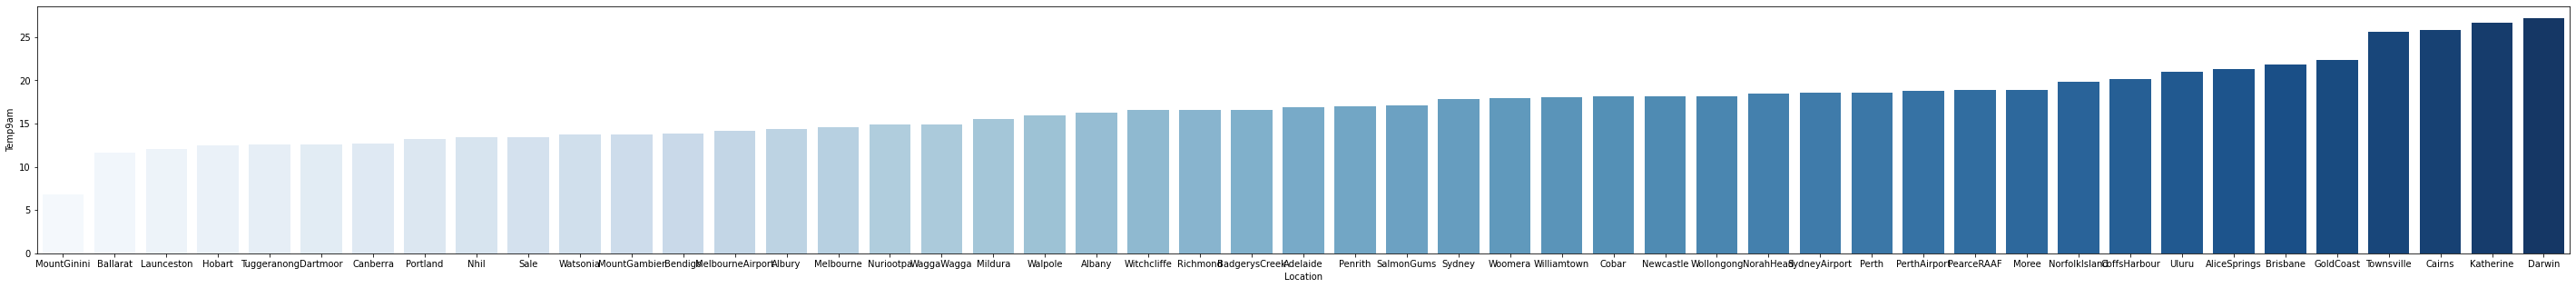

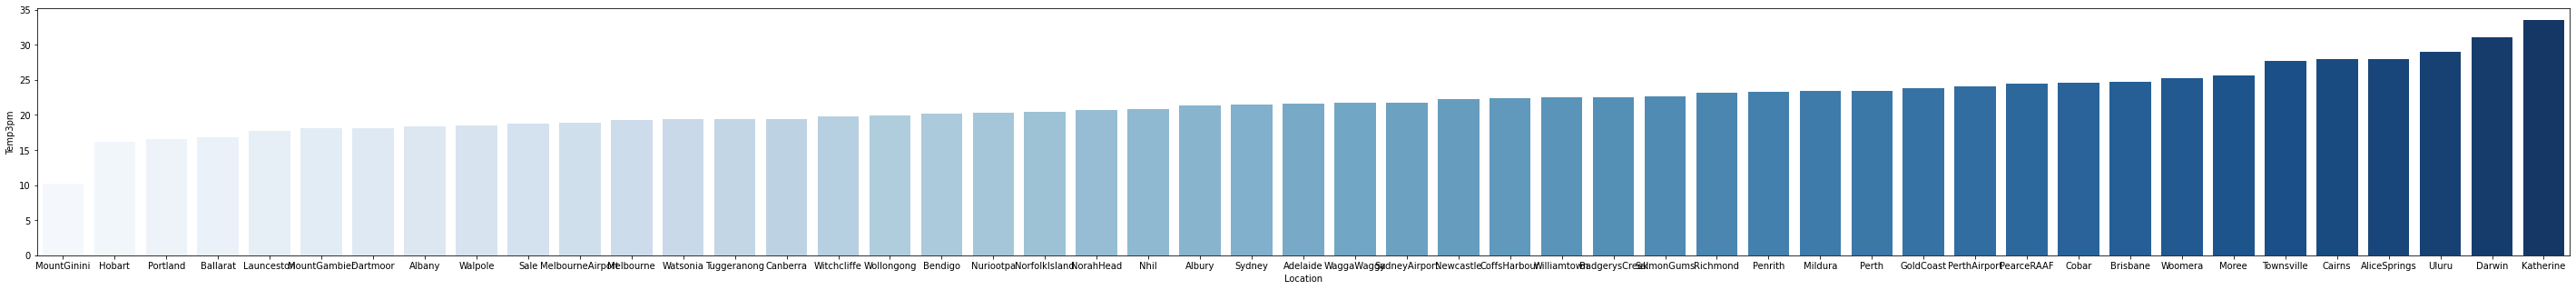

In [25]:
barplotter(grouped_df)

* 3 locations with least minimum temperature are Mount Ginini, Canberra and Tuggeranong. Highest minimum temperature are Katherine, Caims, Darwin.
* 3 locations with least maximum temperature are Mount Ginini, Hobart and Portland. Highest maximum temperature are Uluru, Darwin and Katherine.
* Lowest rainfall experienced in Woomera, Uluru and Alice Springs. Highest rainfall experienced in Harbour, Darwin and Cairns.
* Lowest evaporation experienced in Dartmoor while highest in Woomera.
* Lowest sunshine levels are in Watson while highest in Alice Springs.
* Wind speeds are lowest in Brisbane while highest in Hobart.
* Humidity is lowest in Alice Springs and Uluru while its highest in Dartmoor and Mount Ginini.
* Pressure levels are constant across all locations.
* Cloud levels are lowest in Woomera while highest in Portland, Albury and Ballarat.

<AxesSubplot:>

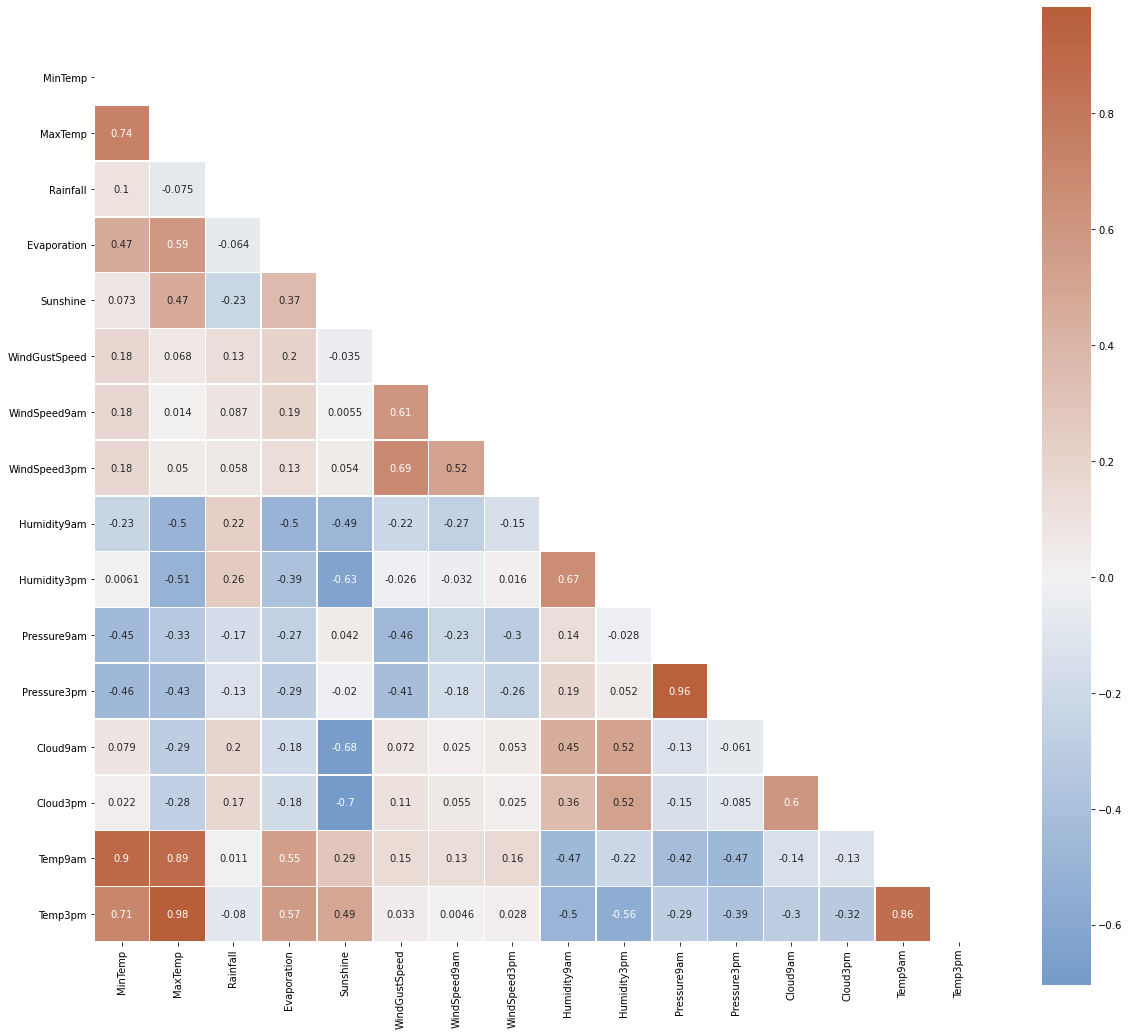

In [26]:
# correlation 
corr_df = data.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

* Max temperature is highly correlated to Temperature at 9am and Minimum temperature
* Pressure at 9am is highly correlated to Pressure at 3pm, it seems the pressures impact each other at different time periods during the day.
* Cloud and Sunshine are negatively correlated, which also makes sense.
* Wind and Pressure are also negatively correlated, although the correlation is weak.
* Humidity and Cloud levels are positively correlated, with a weak correlation.
* Windspeed at 9am and 3pm are positively correlated with overall Wind Gust speed.
* Evaporation is positively correlated with max temperature, as evaporation increases with increase in temperature.

# Modeling the data and Interpretation

In [27]:
# Dropping columns with more than 40% null values and lower significance value. 
clean_data = data.drop(['Sunshine','Evaporation', 'Cloud9am', 'Cloud3pm','Date'], axis = 1)

In [28]:
# Filtering column names on numerical columns or object columns
obj_cols = [col for col in clean_data.columns if clean_data[col].dtypes == 'O']
num_cols = [col for col in clean_data.columns if clean_data[col].dtypes != 'O']

In [29]:
# Replacing null values with median values for numerical columns
for col in num_cols:
    median_val = clean_data[col].median()
    clean_data[col].fillna(median_val, inplace=True)   

In [30]:
# Replacing null values with mode or high frequency values for numerical columns
for col in obj_cols:
    mode_val = clean_data[col].mode()[0]
    clean_data[col].fillna(mode_val, inplace=True)

In [31]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  object 
 17  RainTomorrow   145460 non-nul

In [32]:
# Converting all object values with numerical values by label encoding
clean_data_enc = clean_data
le =  LabelEncoder()
for col in obj_cols:
    clean_data_enc[col] = le.fit_transform(clean_data_enc[col])

In [33]:
clean_data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  int32  
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  int32  
 7   WindDir3pm     145460 non-null  int32  
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  int32  
 17  RainTomorrow   145460 non-nul

In [34]:
# Scaling all numerical values to ensure there is minimum variance in all columns.
scaler = MinMaxScaler()
cols = clean_data_enc.columns
clean_data_enc = scaler.fit_transform(clean_data_enc)
clean_data_enc = pd.DataFrame(clean_data_enc, columns=[cols])

In [35]:
clean_data_enc.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.041667,0.516509,0.523629,0.001617,0.866667,0.294574,0.866667,0.933333,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.508439,0.522073,0.0,0.0
1,0.041667,0.375000,0.565217,0.000000,0.933333,0.294574,0.400000,1.000000,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.514768,0.570058,0.0,0.0
2,0.041667,0.504717,0.576560,0.000000,1.000000,0.310078,0.866667,1.000000,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.594937,0.548944,0.0,0.0
3,0.041667,0.417453,0.620038,0.000000,0.266667,0.139535,0.600000,0.000000,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.533755,0.612284,0.0,0.0
4,0.041667,0.613208,0.701323,0.002695,0.866667,0.271318,0.066667,0.466667,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.527426,0.673704,0.0,0.0


In [36]:
# Separating the target variable and splitting the dataset into train and test with 25% split into test set.
X = clean_data_enc.drop(['RainTomorrow'], axis=1)
y = clean_data_enc['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

In [37]:
# Prepping the model list - we will be testing with 5 different classification models and choosing the best performing model with best parameters.
seed=1
models = [
            'AdaBoostClassifier',
            'GradientBoostingClassifier',
            'RandomForestClassifier',
            'KNeighborsClassifier',
            'LogisticRegressionClassifier'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        LogisticRegression(solver='newton-cg', multi_class='multinomial')
        ]
params = {
            models[0]:{'learning_rate':[0.01], 'n_estimators':[150]},
            models[1]:{'learning_rate':[0.01],'n_estimators':[100], 'max_depth':[3],
                       'min_samples_split':[2],'min_samples_leaf': [2]},
            models[2]:{'n_estimators':[100], 'criterion':['gini'],'min_samples_split':[2],
                      'min_samples_leaf': [4]},
            models[3]:{'n_neighbors':[5], 'weights':['distance'],'leaf_size':[15]},
            models[4]: {'C':[2000], 'tol': [0.0001]}
         }

In [38]:
# Running a grid search to find the best performing model with optimal hyper parameters 
for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='roc_auc', refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    acc = accuracy_score(y_test, clf.predict(X_test))
    print("Accuracy: {:.4%}".format(acc))

AdaBoostClassifier
best params: {'learning_rate': 0.01, 'n_estimators': 150}
best scores: 0.8111687006538789
Accuracy: 82.6976%
GradientBoostingClassifier
best params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.8334184110081061
Accuracy: 82.8516%
RandomForestClassifier
best params: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.8735204280606583
Accuracy: 85.3788%
KNeighborsClassifier
best params: {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}
best scores: 0.8093942332761712
Accuracy: 83.4841%
LogisticRegressionClassifier
best params: {'C': 2000, 'tol': 0.0001}
best scores: 0.8494793467663188
Accuracy: 84.3118%


Based on the Grid Search, Random Forest seems to be best model out of the 5 with 85% accuracy and a model score of 0.875. The best hyper parameters for this are {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

In [40]:
# Creating the random forest model with the optimal hyper parameters
params= {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

Accuracy = 0.8549429396397635
ROC Area under Curve = 0.7243739690516884
              precision    recall  f1-score   support

         0.0    0.86986   0.95732   0.91149     28374
         1.0    0.76431   0.49143   0.59822      7991

    accuracy                        0.85494     36365
   macro avg    0.81708   0.72437   0.75486     36365
weighted avg    0.84666   0.85494   0.84265     36365



* The Random forest based model has an accuracy of ~85%, this can be improved further with more tuning and feature engineering.
* The precision and recall scores are good for days predicting no rainfall. The scores are very low for days predicting rainfall, this is due to an imbalanced dataset.
* The F1-scores are good for days predicting no rainfall (0.91) while it is very low for days predicting rainfall (0.598).
* Based on this, the model will predict most days as days with no rainfall. 

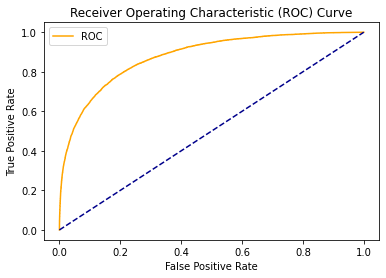

In [43]:
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

Looking at the ROC curve, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.

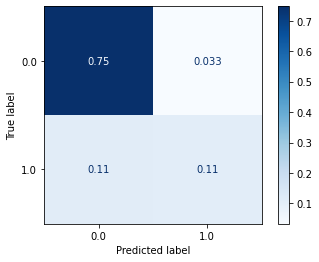

In [44]:
plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

Looking at the confusion matrix, the model will predict no rainfall days 75% of the time correctly however, it will only predict rainfall days 11% of the time. It will predict rainfall days as no rainfall days 33% of the time making them as incorrect predictions.  

In [47]:
# Saving the model for future usage.
filename = 'rainfall_prediction_model.sav'
pickle.dump(model, open(filename, 'wb'))